## Imports and Setup

In [1]:
import os
os.chdir("..")

from src.dfcv_colocation_mapping import data_download
from src.dfcv_colocation_mapping import data_utils
from src.dfcv_colocation_mapping import map_utils

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

%load_ext autoreload
%autoreload 2

## Parameters

In [2]:
iso_code = "RWA"
adm_level = "ADM3"

## Download Datasets

In [3]:
dm = data_download.DatasetManager(
    iso_code, 
    adm_level=adm_level,
    data_dir="data/",
    config_file="src/dfcv_colocation_mapping/configs/data_config.yaml",
    acled_file="creds/acled_creds.yaml",
    adm_config_file="src/dfcv_colocation_mapping/configs/adm_config.yaml",
    mhs_aggregation="power_mean"
)
geoplot = map_utils.GeoPlot(dm, data_dir="data/", map_config_file="src/dfcv_colocation_mapping/configs/map_config.yaml")
dm.data.sort_values(f"mhs_all_wbg_acled_{dm.asset}_exposure_relative", ascending=False).head(3)

INFO:root:Loading geoboundary...
INFO:root:Loading asset and hazard layers...
INFO:root:Downloading conflict data from 2015-09-09 to 2025-09-09
INFO:root:Loading ACLED conflict data...
INFO:root:Loading UCDP conflict data...
INFO:root:Calculating scores...


iso_code       ADM3                  ADM3_ID                  ADM2_ID    ADM2                  ADM1_ID              ADM1      worldpop                                           geometry  earthquake  earthquake_worldpop_exposure  earthquake_worldpop_intensity_weighted_exposure  landslide  landslide_worldpop_exposure  landslide_worldpop_intensity_weighted_exposure   cyclone  cyclone_worldpop_exposure  cyclone_worldpop_intensity_weighted_exposure   drought  drought_worldpop_exposure  drought_worldpop_intensity_weighted_exposure  heat_stress  heat_stress_worldpop_exposure  heat_stress_worldpop_intensity_weighted_exposure  fluvial_flood  fluvial_flood_worldpop_exposure  fluvial_flood_worldpop_intensity_weighted_exposure  acled_population_best  acled_conflict_count  acled_null_conflict_count  acled_exposure  wbg_acled_worldpop_exposure  ucdp_conflict_count  ucdp_worldpop_exposure  earthquake_worldpop_exposure_relative  earthquake_worldpop_intensity_weighted_exposure_relative  \
199      RWA   Bugarama  94199721B28126171529858  40016504B69203145422490  Rusizi  46589978B43518966718904  Western Province  31459.771484  POLYGON ((29.02501 -2.68467, 29.02497 -2.68469...    0.233319                  31459.771484                                     27851.310547   1.978723                 10111.617188                                     8990.614258  0.003393                        0.0                                           0.0  1.684446                        0.0                                           0.0  3327.325581                    14060.03125                                      13152.222656       5.280000                      3648.251465                                         956.438965                     NaN                   3.0                        3.0             NaN                 31161.875000                  NaN                     NaN                                    1.0                                           0.885299          
170      RWA  Nyamyumba  94199721B54264211227542  40016504B41870686260998  Rubavu  46589978B43518966718904  Western Province  46052.453125  POLYGON ((29.31081 -1.73826, 29.31066 -1.73782...    0.208933                  46052.453125                                     37130.050781   3.191489                 45274.078125                                    40167.820312  0.002091                        0.0                                           0.0  1.121762                        0.0                                           0.0  2029.780488                        0.00000                                          0.000000       0.000000                         0.000000                                           0.000000                     NaN                   1.0                        1.0             NaN                 46052.453125                  3.0            45420.230469                                    1.0                                           0.806256          
210      RWA     Nkanka  94199721B89108159277906  40016504B69203145422490  Rusizi  46589978B43518966718904  Western Province  20910.195312  POLYGON ((28.96774 -2.41137, 28.96776 -2.41131...    0.259736                  20910.195312                                     20725.296875   2.666667                 13192.648438                                    11216.468750  0.000000                        0.0                                           0.0  0.256092                        0.0                                           0.0  1431.789474                        0.00000                                          0.000000       9.316667                       758.306030                                         563.656799                 40527.0                   1.0                        NaN         40527.0                 20910.195312                  NaN                     NaN                                    1.0                                           0.991157          

     landslide_worldpop_exposure_relati

## AHP Weight Calculation [Optional]

In [11]:
dm.calculate_ahp()
geoplot = map_utils.GeoPlot(dm)
dm.data.sort_values(f"mhs_all_wbg_acled_{dm.asset}_exposure_relative", ascending=False).head(3)

How much more important is fluvial_flood compared to drought:  1
How much more important is fluvial_flood compared to cyclone:  1
How much more important is fluvial_flood compared to heat_stress:  1
How much more important is fluvial_flood compared to landslide:  1
How much more important is fluvial_flood compared to earthquake:  1
How much more important is fluvial_flood compared to wildfire:  1
How much more important is drought compared to cyclone:  1
How much more important is drought compared to heat_stress:  1
How much more important is drought compared to landslide:  1
How much more important is drought compared to earthquake:  1
How much more important is drought compared to wildfire:  1
How much more important is cyclone compared to heat_stress:  1
How much more important is cyclone compared to landslide:  1
How much more important is cyclone compared to earthquake:  1
How much more important is cyclone compared to wildfire:  1
How much more important is heat_stress compared t

INFO:root:Consistency_ratio: 0.0
INFO:root:{'hydrological': {'fluvial_flood': 0.14286, 'fluvial_defended': 1, 'pluvial_defended': 1, 'coastal_defended': 1, 'drought': 0.14286}, 'atmospheric': {'cyclone': 0.14286, 'heat_stress': 0.14286}, 'geophysical': {'landslide': 0.14286, 'earthquake': 0.14286}, 'biophysical': {'wildfire': 0.14286}}


iso_code   ADM3                     ADM3_ID                  ADM2_ID      ADM2                  ADM1_ID      ADM1      worldpop                                           geometry  earthquake  earthquake_worldpop_exposure  earthquake_worldpop_intensity_weighted_exposure  landslide  landslide_worldpop_exposure  landslide_worldpop_intensity_weighted_exposure  cyclone  cyclone_worldpop_exposure  cyclone_worldpop_intensity_weighted_exposure   drought  drought_worldpop_exposure  drought_worldpop_intensity_weighted_exposure  heat_stress  heat_stress_worldpop_exposure  heat_stress_worldpop_intensity_weighted_exposure  fluvial_flood  fluvial_flood_worldpop_exposure  fluvial_flood_worldpop_intensity_weighted_exposure   wildfire  wildfire_worldpop_exposure  wildfire_worldpop_intensity_weighted_exposure  acled_population_best  acled_conflict_count  acled_fatalities  acled_null_conflict_count  acled_exposure  acled_fatalities_per_conflict  wbg_acled_worldpop_exposure  ucdp_conflict_count  \
187      COD  Kindu  COD-ADM3-77481523B41097694  19810634B60237877994268     Kindu  86934994B38674916583754   Maniema  255926.18750  POLYGON ((25.86848 -3.0339, 25.90518 -3.04215,...    0.052922                        0.0000                                          0.00000   1.000000                     0.000000                                        0.000000  0.00000                        0.0                                           0.0 -0.881788              228320.968750                                  46690.816406  2171.500000                   80720.562500                                      63150.476562      10.507097                     24931.734375                                        7724.016602   13.456591                255926.18750                                   57180.253906              3774034.0                 113.0              31.0                       34.0    47772.582278                       0.274336                 212494.93750                  1.0   
95       COD  Uvira  COD-ADM3-77481523B24940241  19810634B94310193945162     Uvira  86934994B30859541788597  Sud-Kivu  671572.56250  POLYGON ((28.80436 -2.98794, 28.80639 -2.99768...    0.202094                   671572.5625                                     429194.34375   2.524818                225957.078125                                   174864.265625  0.00364                        0.0                                           0.0  0.280439               66765.507812                                  16094.802734  1563.718645                  214110.328125                                     170902.312500       4.320580                     20129.541016                                        3438.608398   24.501712                663886.50000                                  369246.968750              2906258.0                1204.0            1128.0                      437.0     3789.123859                       0.936877                 650793.37500                 88.0   
158      COD  Ngaba  COD-ADM3-77481523B86570548  19810634B67934203500744  Kinshasa  86934994B67934203500744  Kinshasa  156027.40625  POLYGON ((15.33312 -4.37334, 15.33263 -4.37326...    0.000000                        0.0000                                          0.00000   1.333333                     0.000000                                        0.000000  0.00000                        0.0                                           0.0  0.889577                   0.000000                                      0.000000  2547.500000                  153723.500000                                     122904.679688       0.000000                         0.000000                                           0.000000   12.414358                156027.40625                                   33313.585938               540678.0                   6.0               0.0                        2.0   135169.500000                       0.000000                 156027.40625                  NaN   

     ucdp_fatal

## Plot Regional Groupings

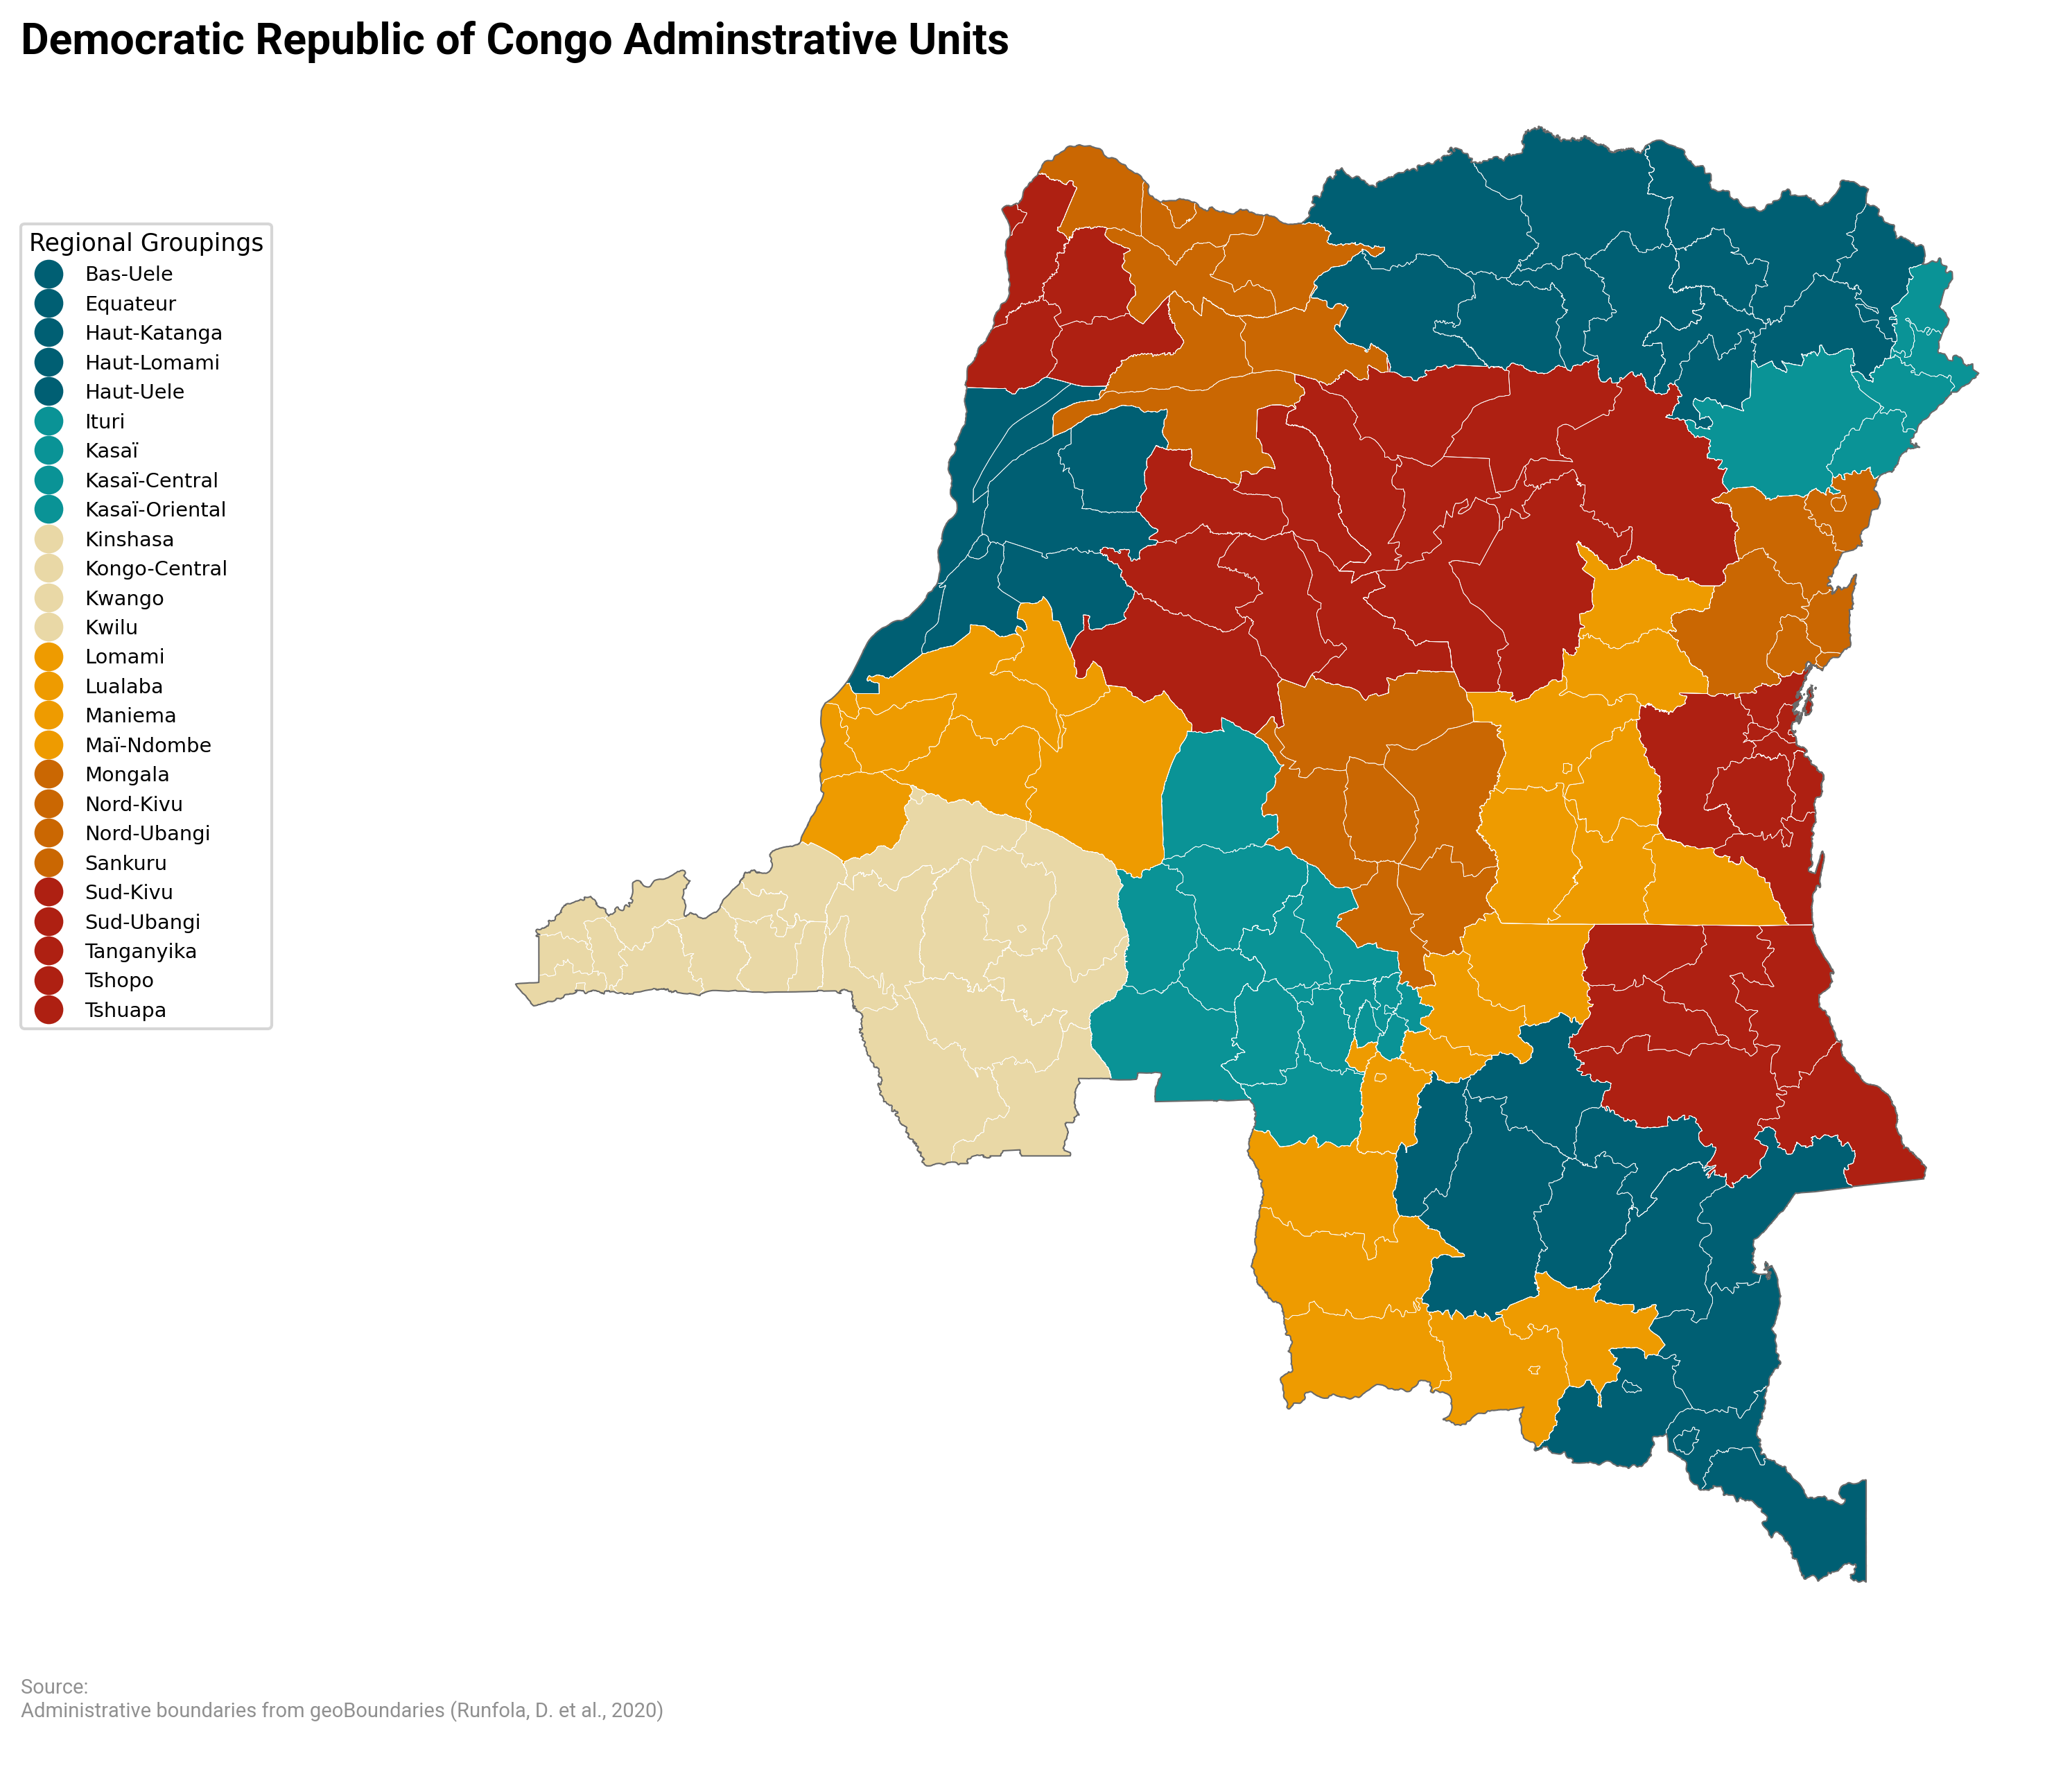

In [16]:
ax, x = geoplot.plot_geoboundaries(
    adm_level="ADM2",
    group="ADM1"
);

## Plot Population

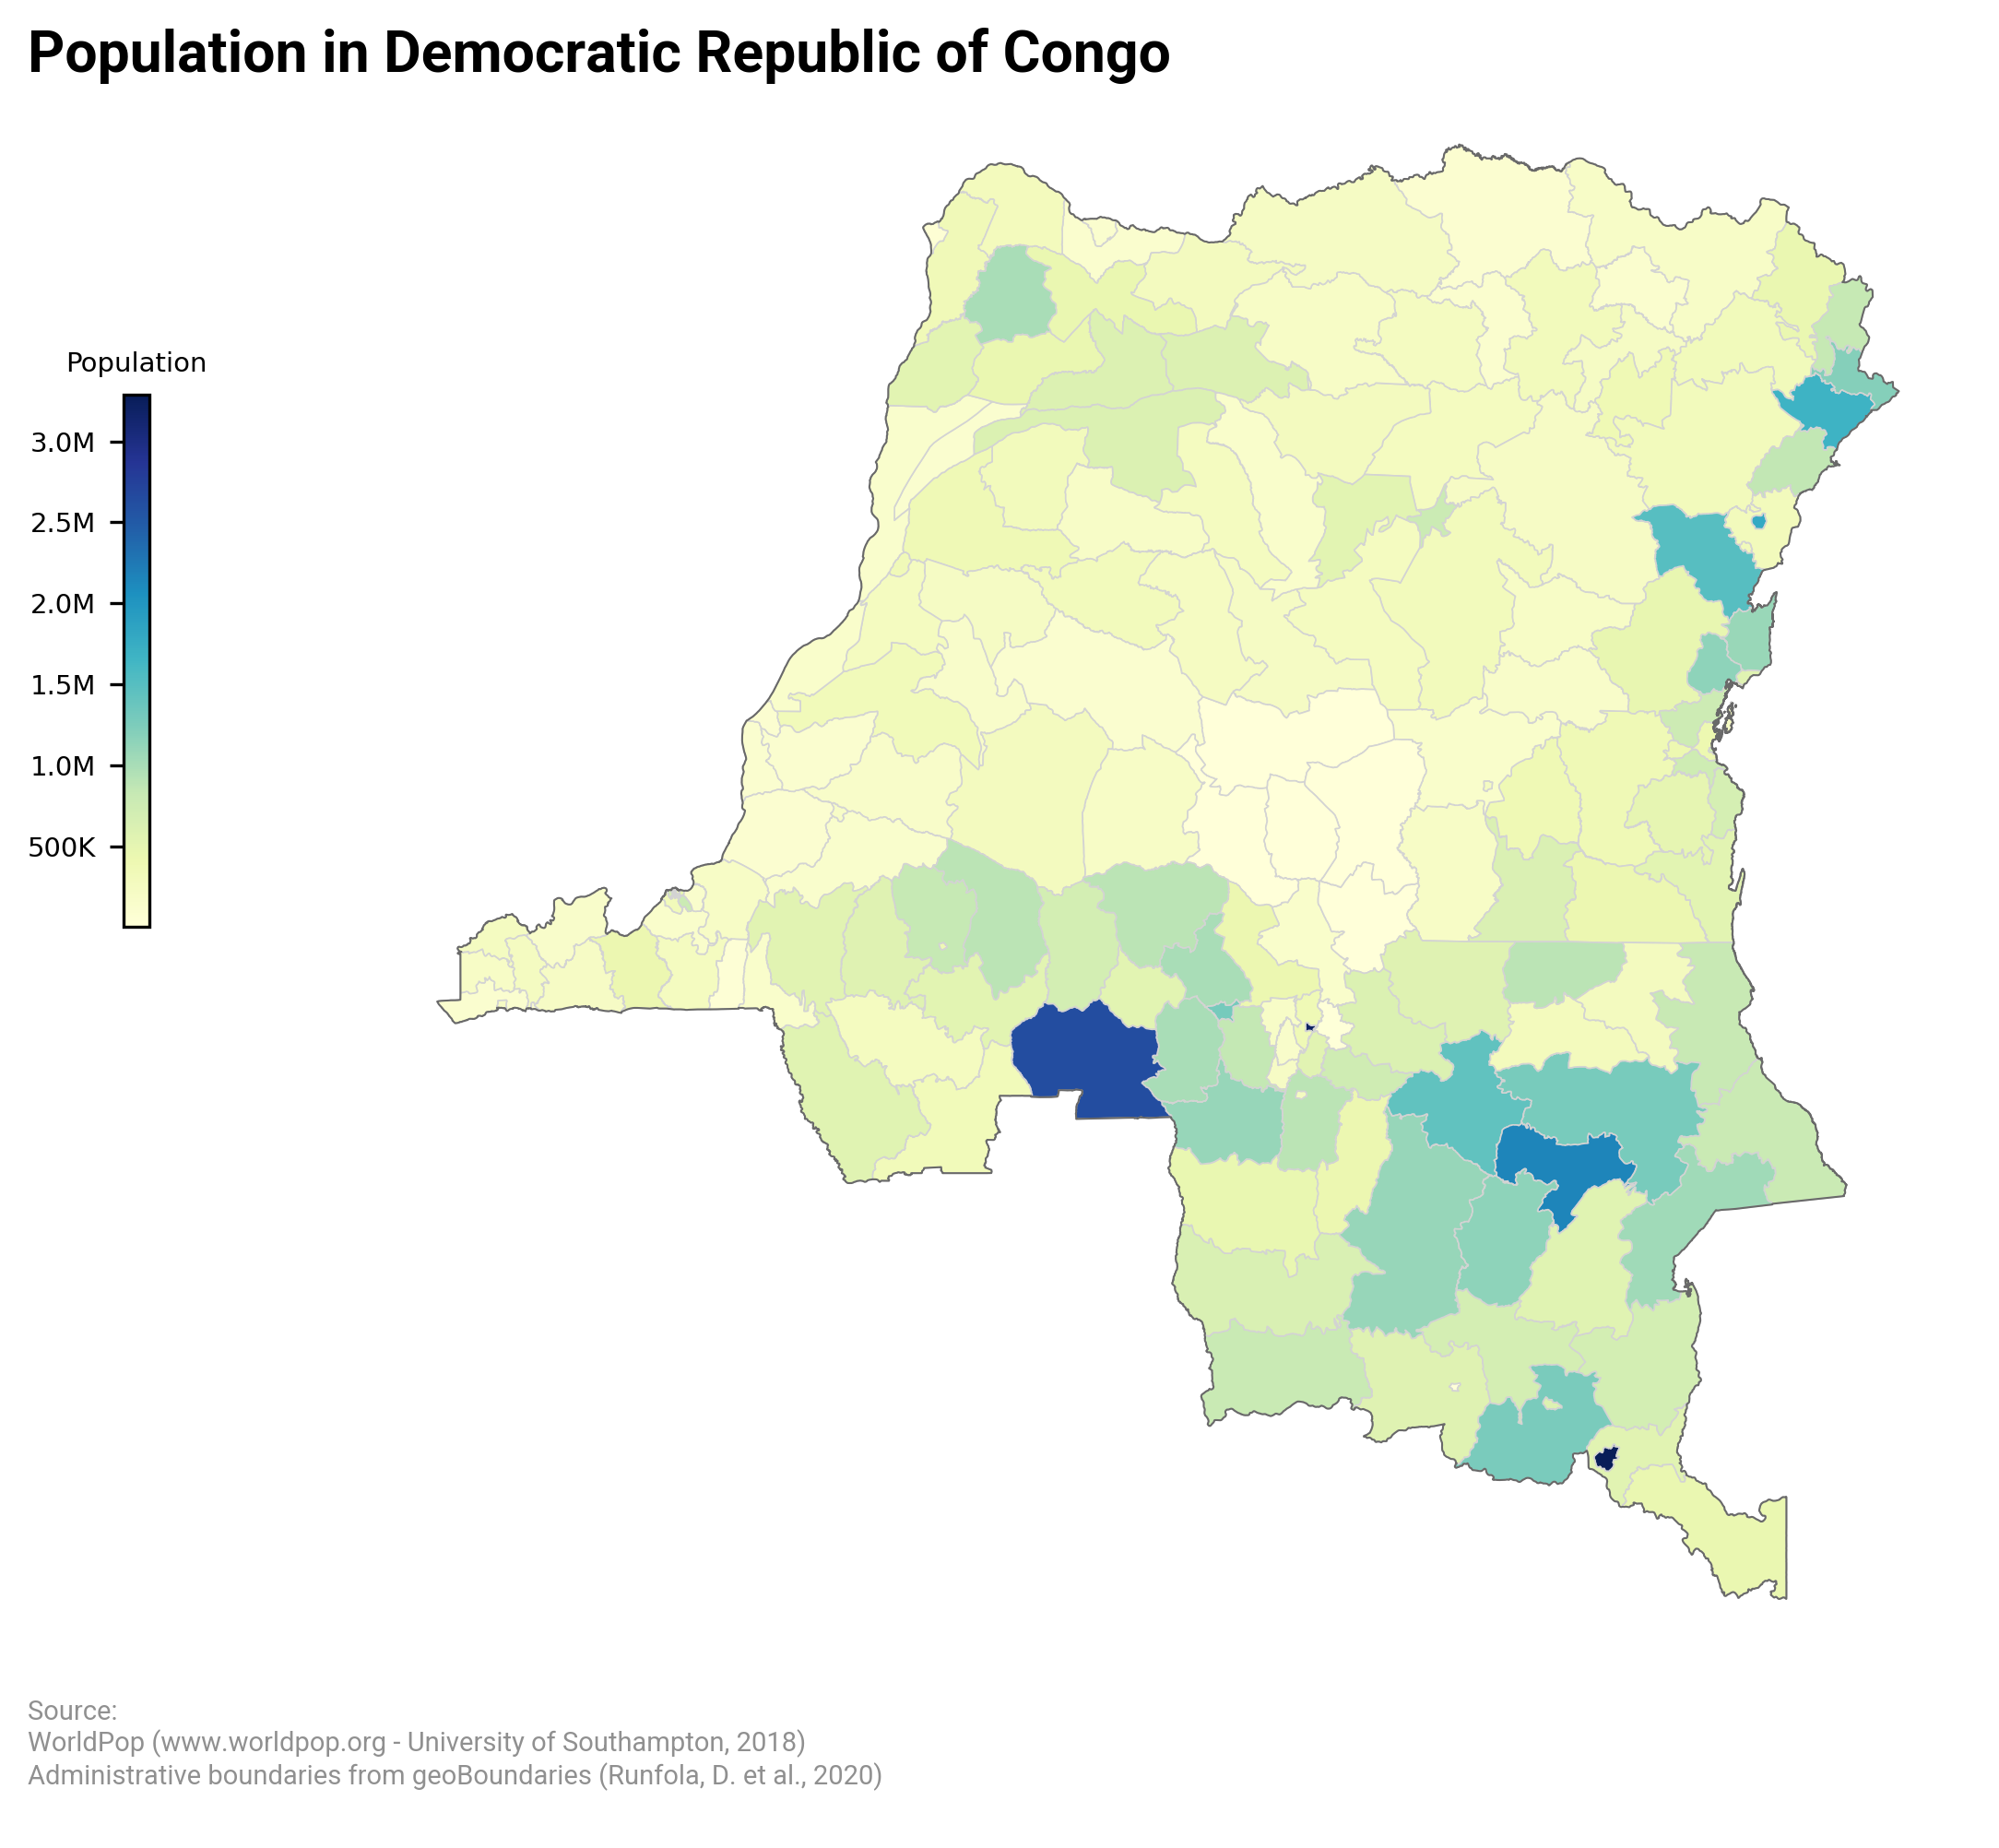

In [17]:
ax, x = geoplot.plot_choropleth( 
    var="worldpop",
    kwargs={"legend_type": "colorbar", "legend_y": 0.475}
)

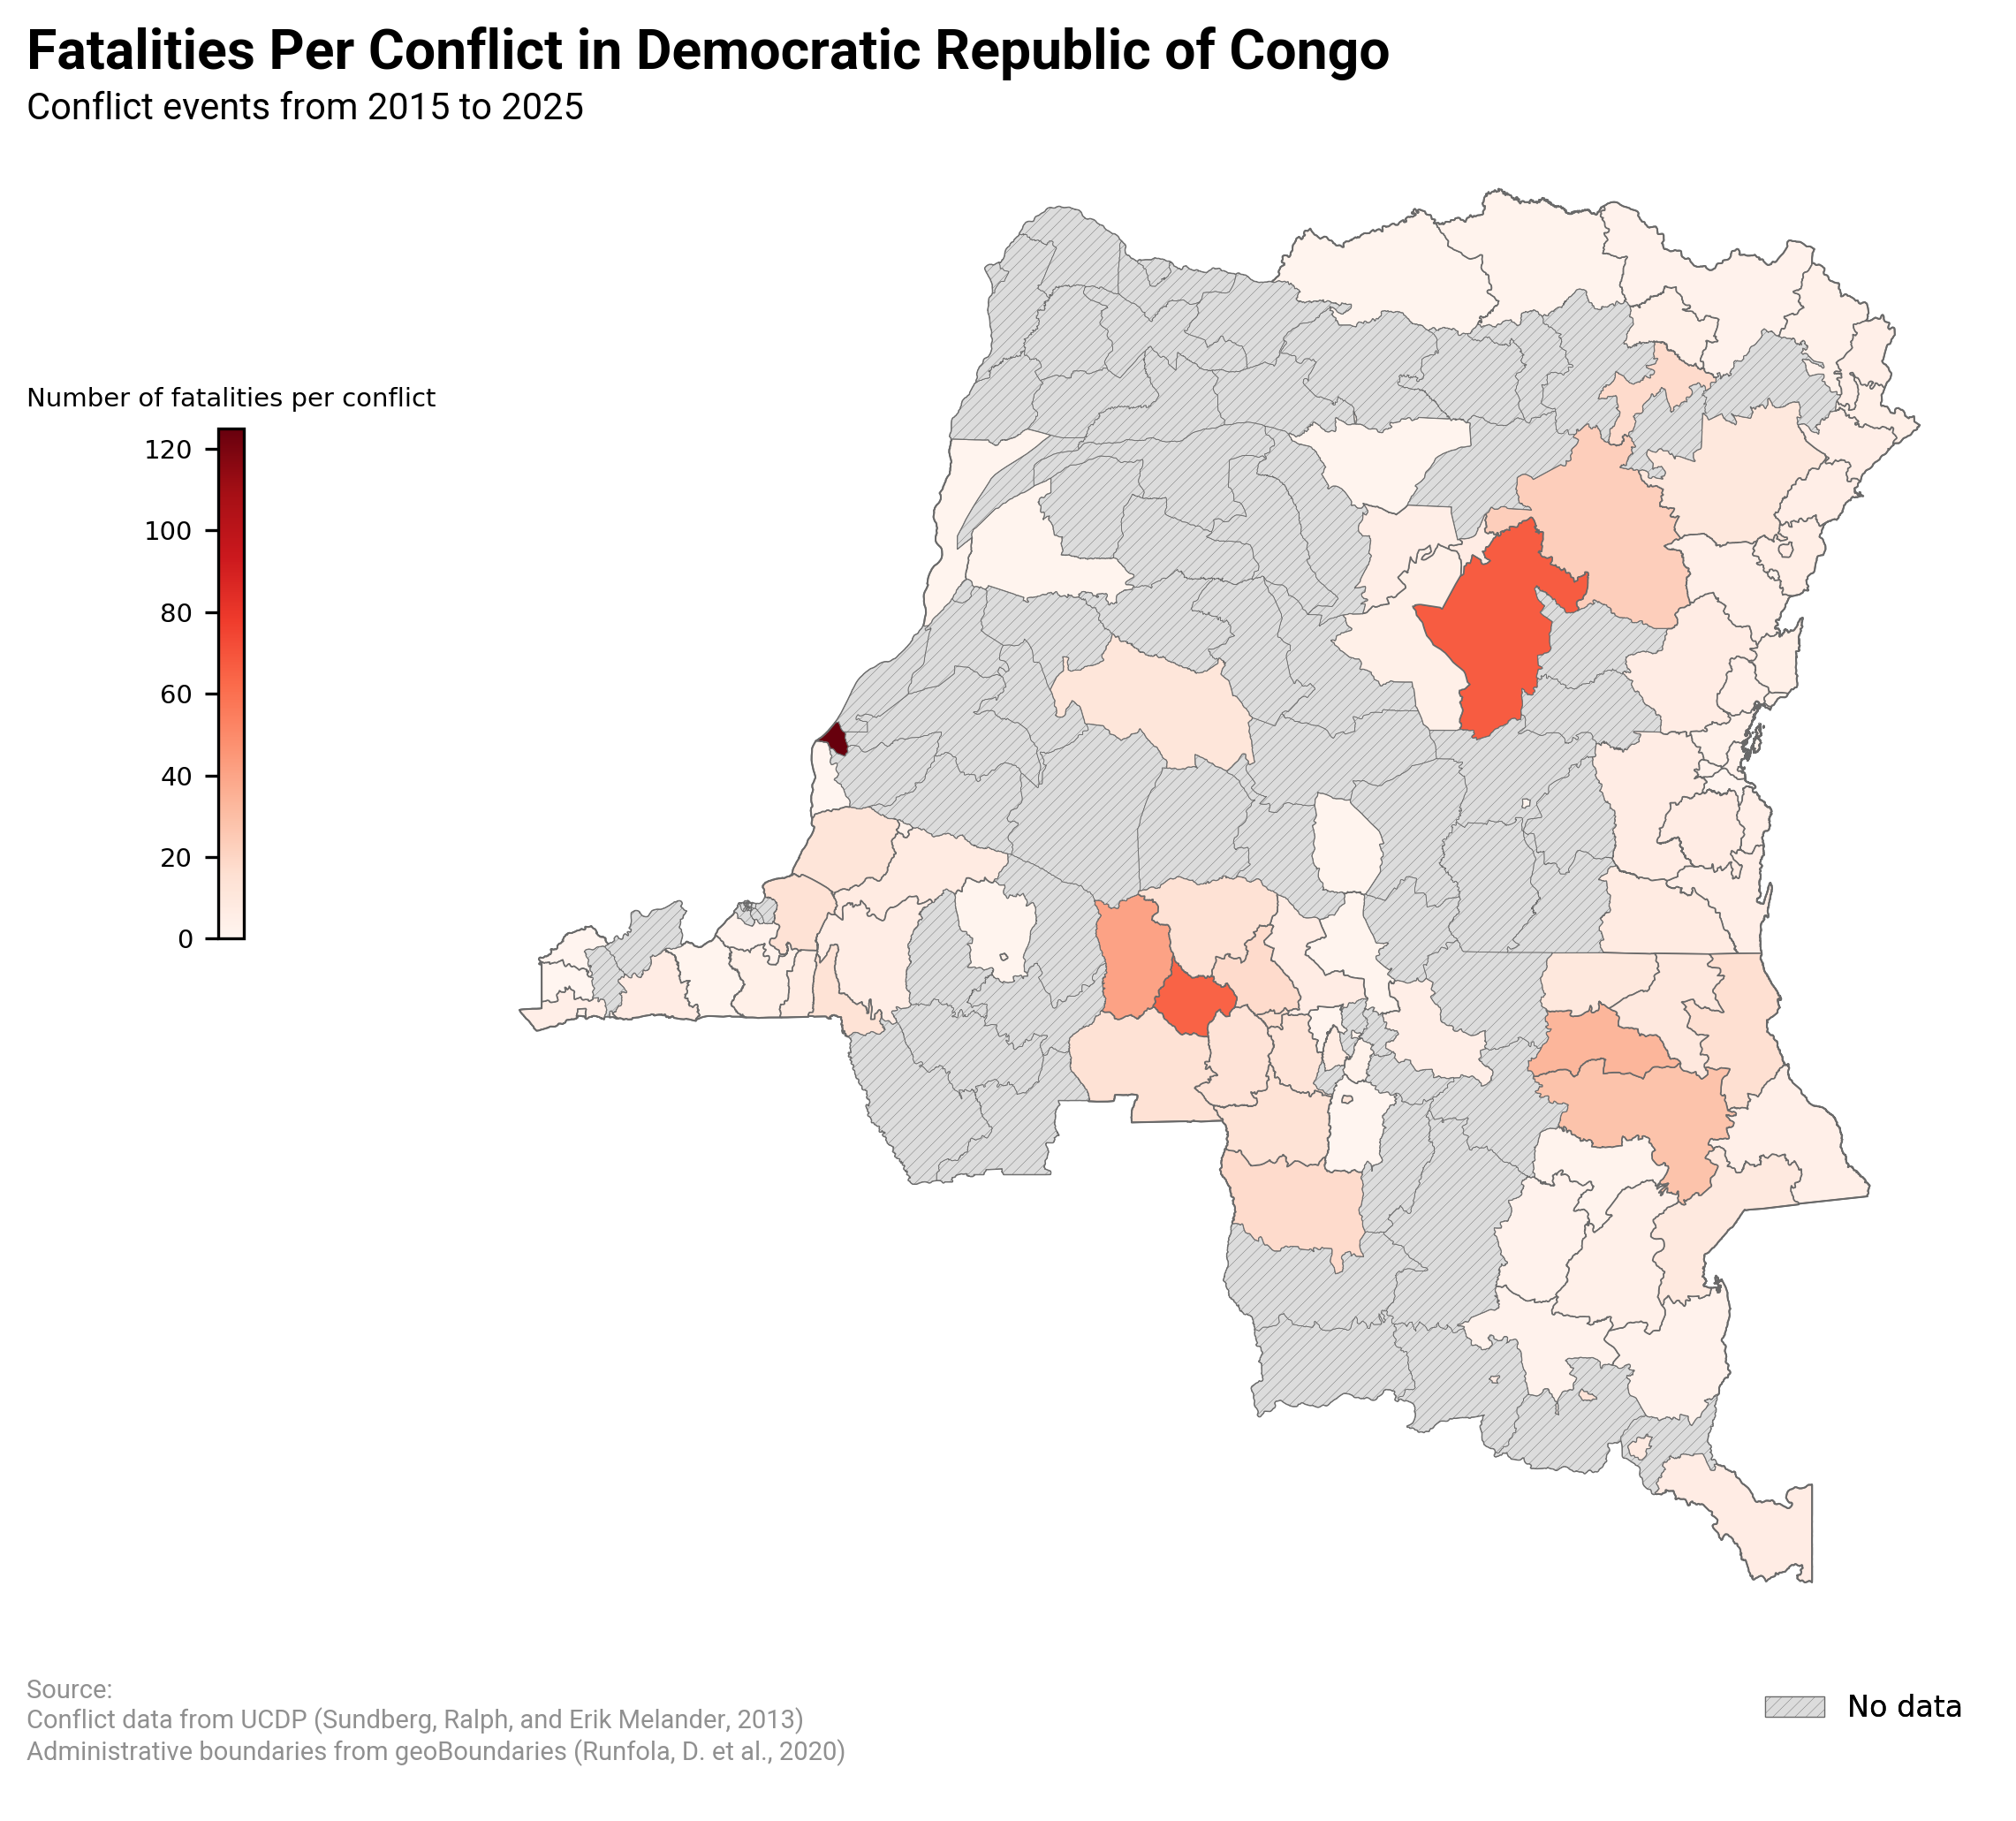

In [18]:
ax, x = geoplot.plot_choropleth( 
    var="ucdp_fatalities_per_conflict",
    kwargs={
        "legend_type": "colorbar",
        "cmap": "Reds",
        "edgecolor": "dimgray",
        "legend_y": 0.475
    }
);

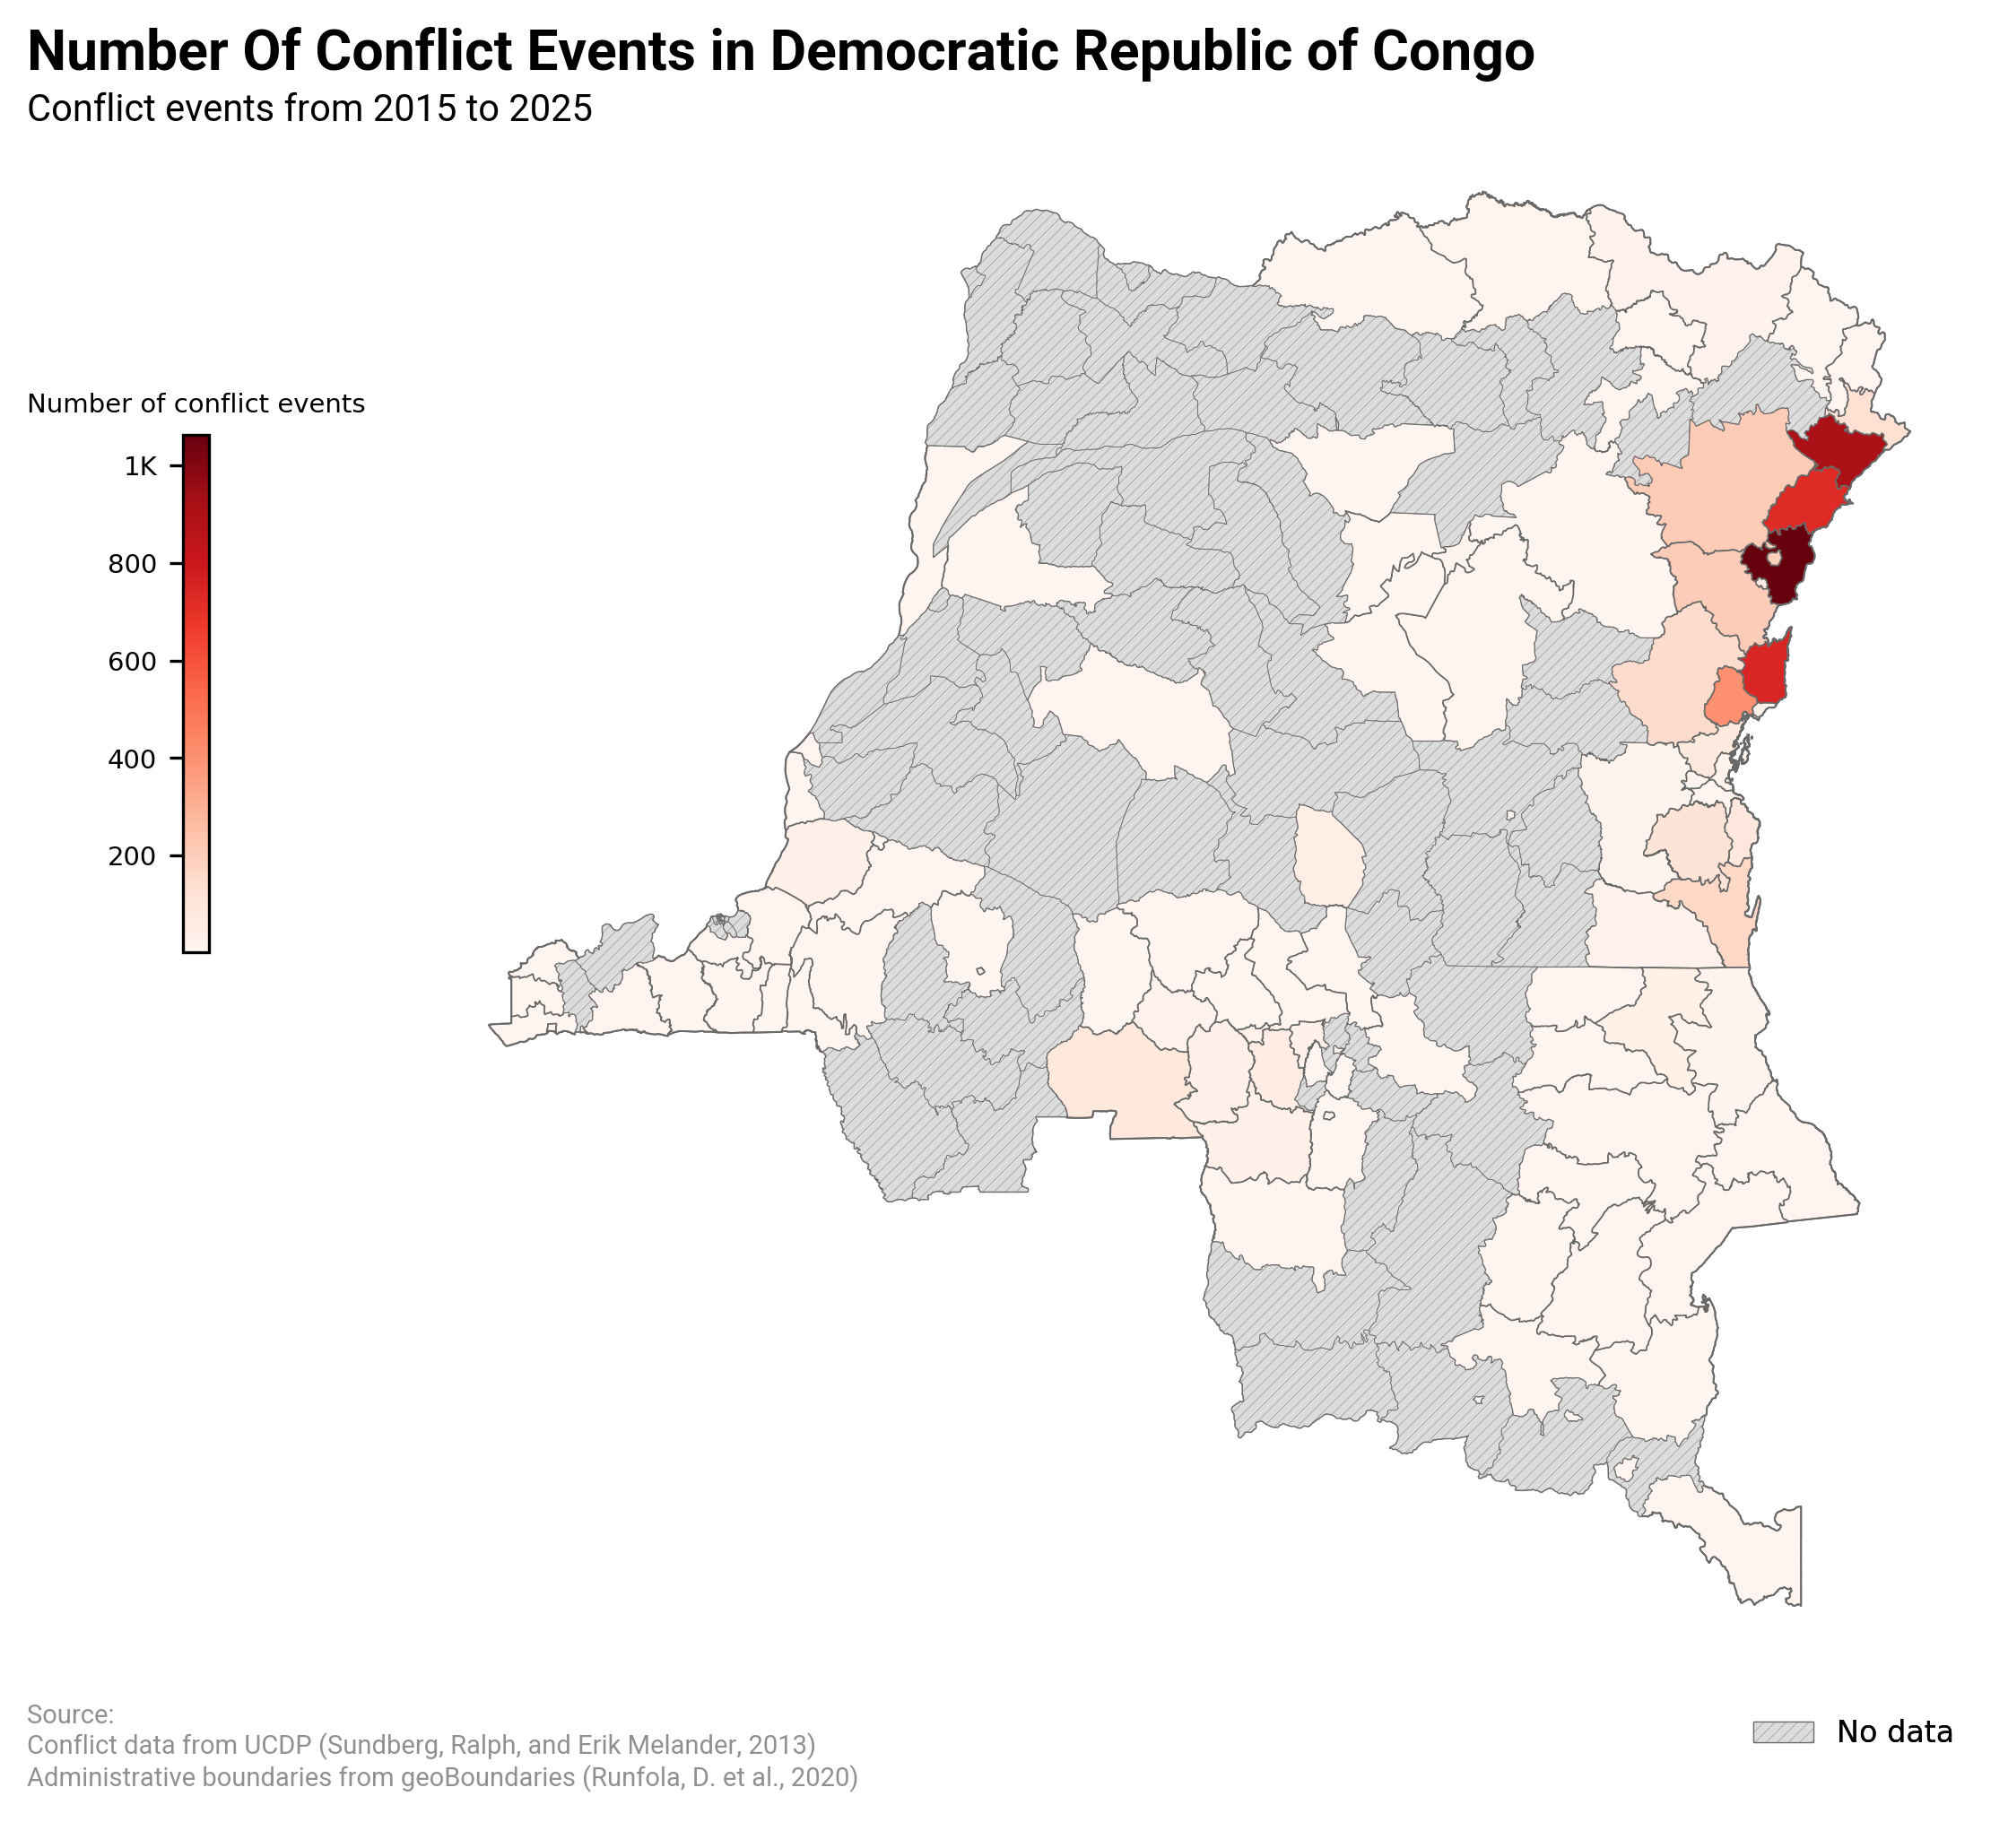

In [19]:
ax, x = geoplot.plot_choropleth( 
    var="ucdp_conflict_count",
    kwargs={
        "legend_type": "colorbar",
        "cmap": "Reds",
        "edgecolor": "dimgray",
        "legend_y": 0.475
    }
);

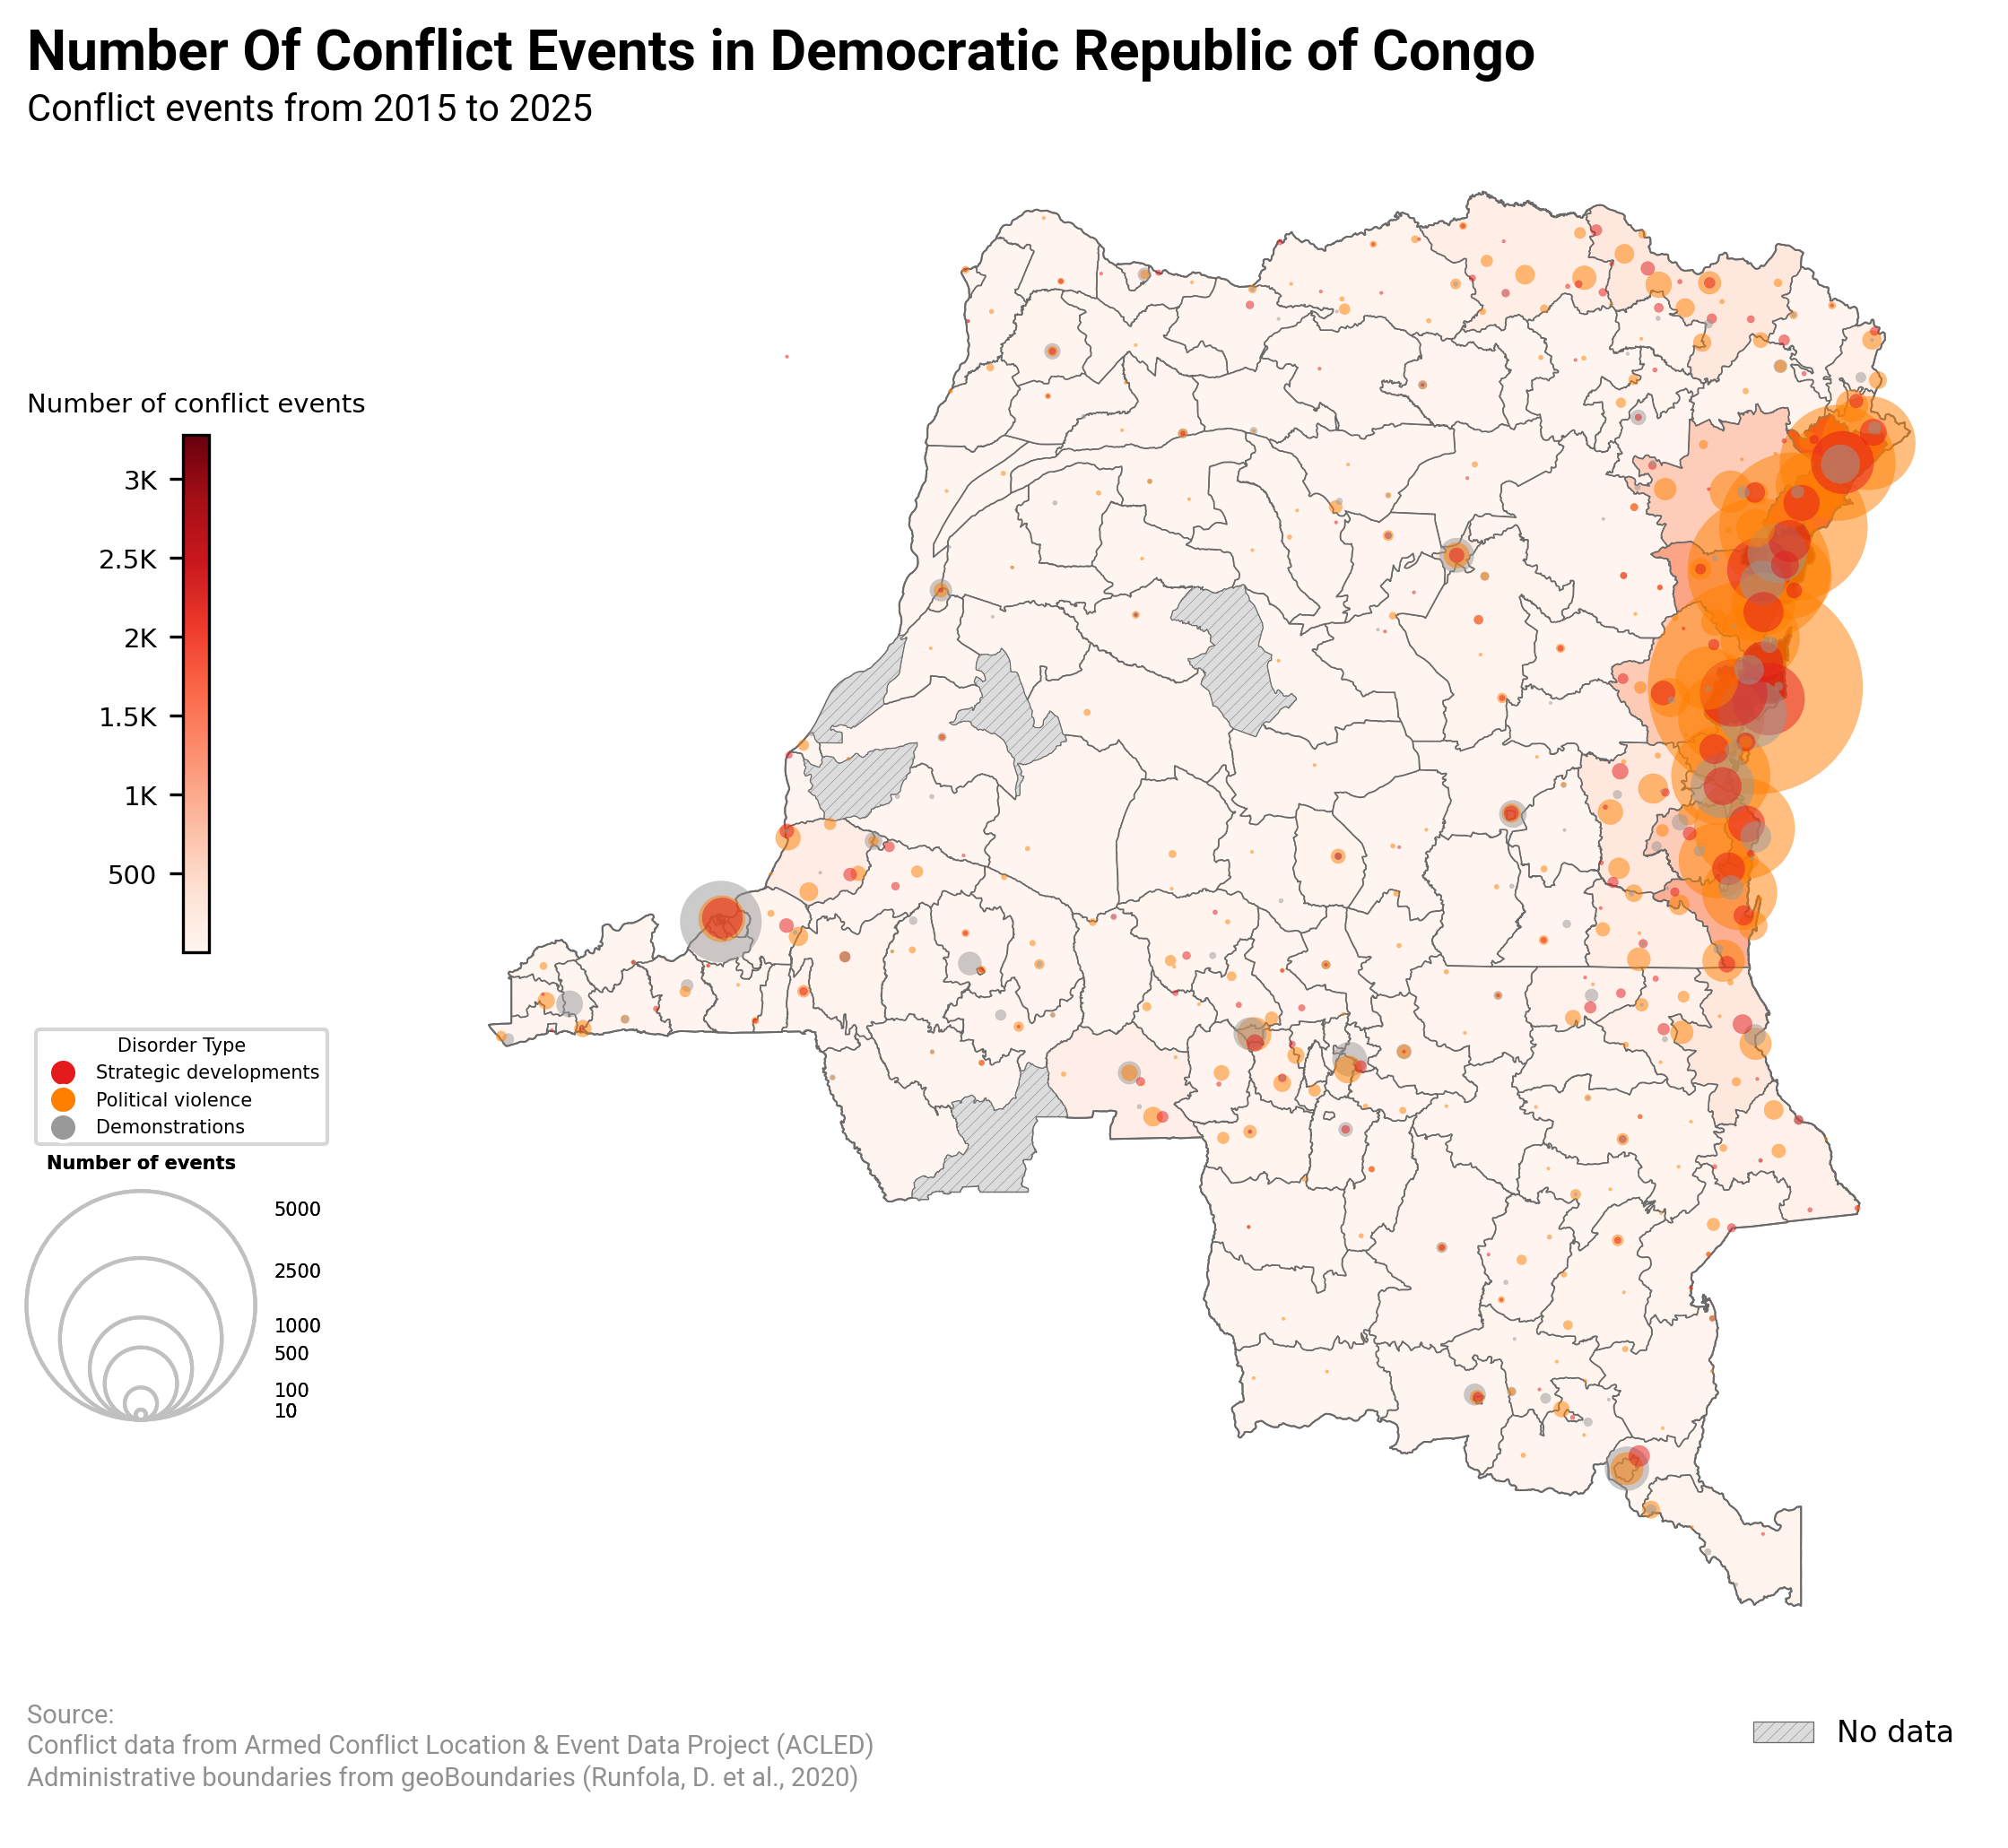

In [26]:
ax, x = geoplot.plot_choropleth( 
    var="acled_conflict_count",
    kwargs={
        "legend_type": "colorbar",
        "cmap": "Reds",
        "edgecolor": "dimgray",
        "legend_y": 0.475
    }
);
geoplot.plot_points(
    "disorder_type", 
    dataset="acled", 
    clustering=True,  
    kwargs={
        "alpha": 0.5,
        "legend_y": 0.425,
        "markerscale": 0.75,
        "cmap": "Set1"
    },
    ax=ax, xpos=x,
);

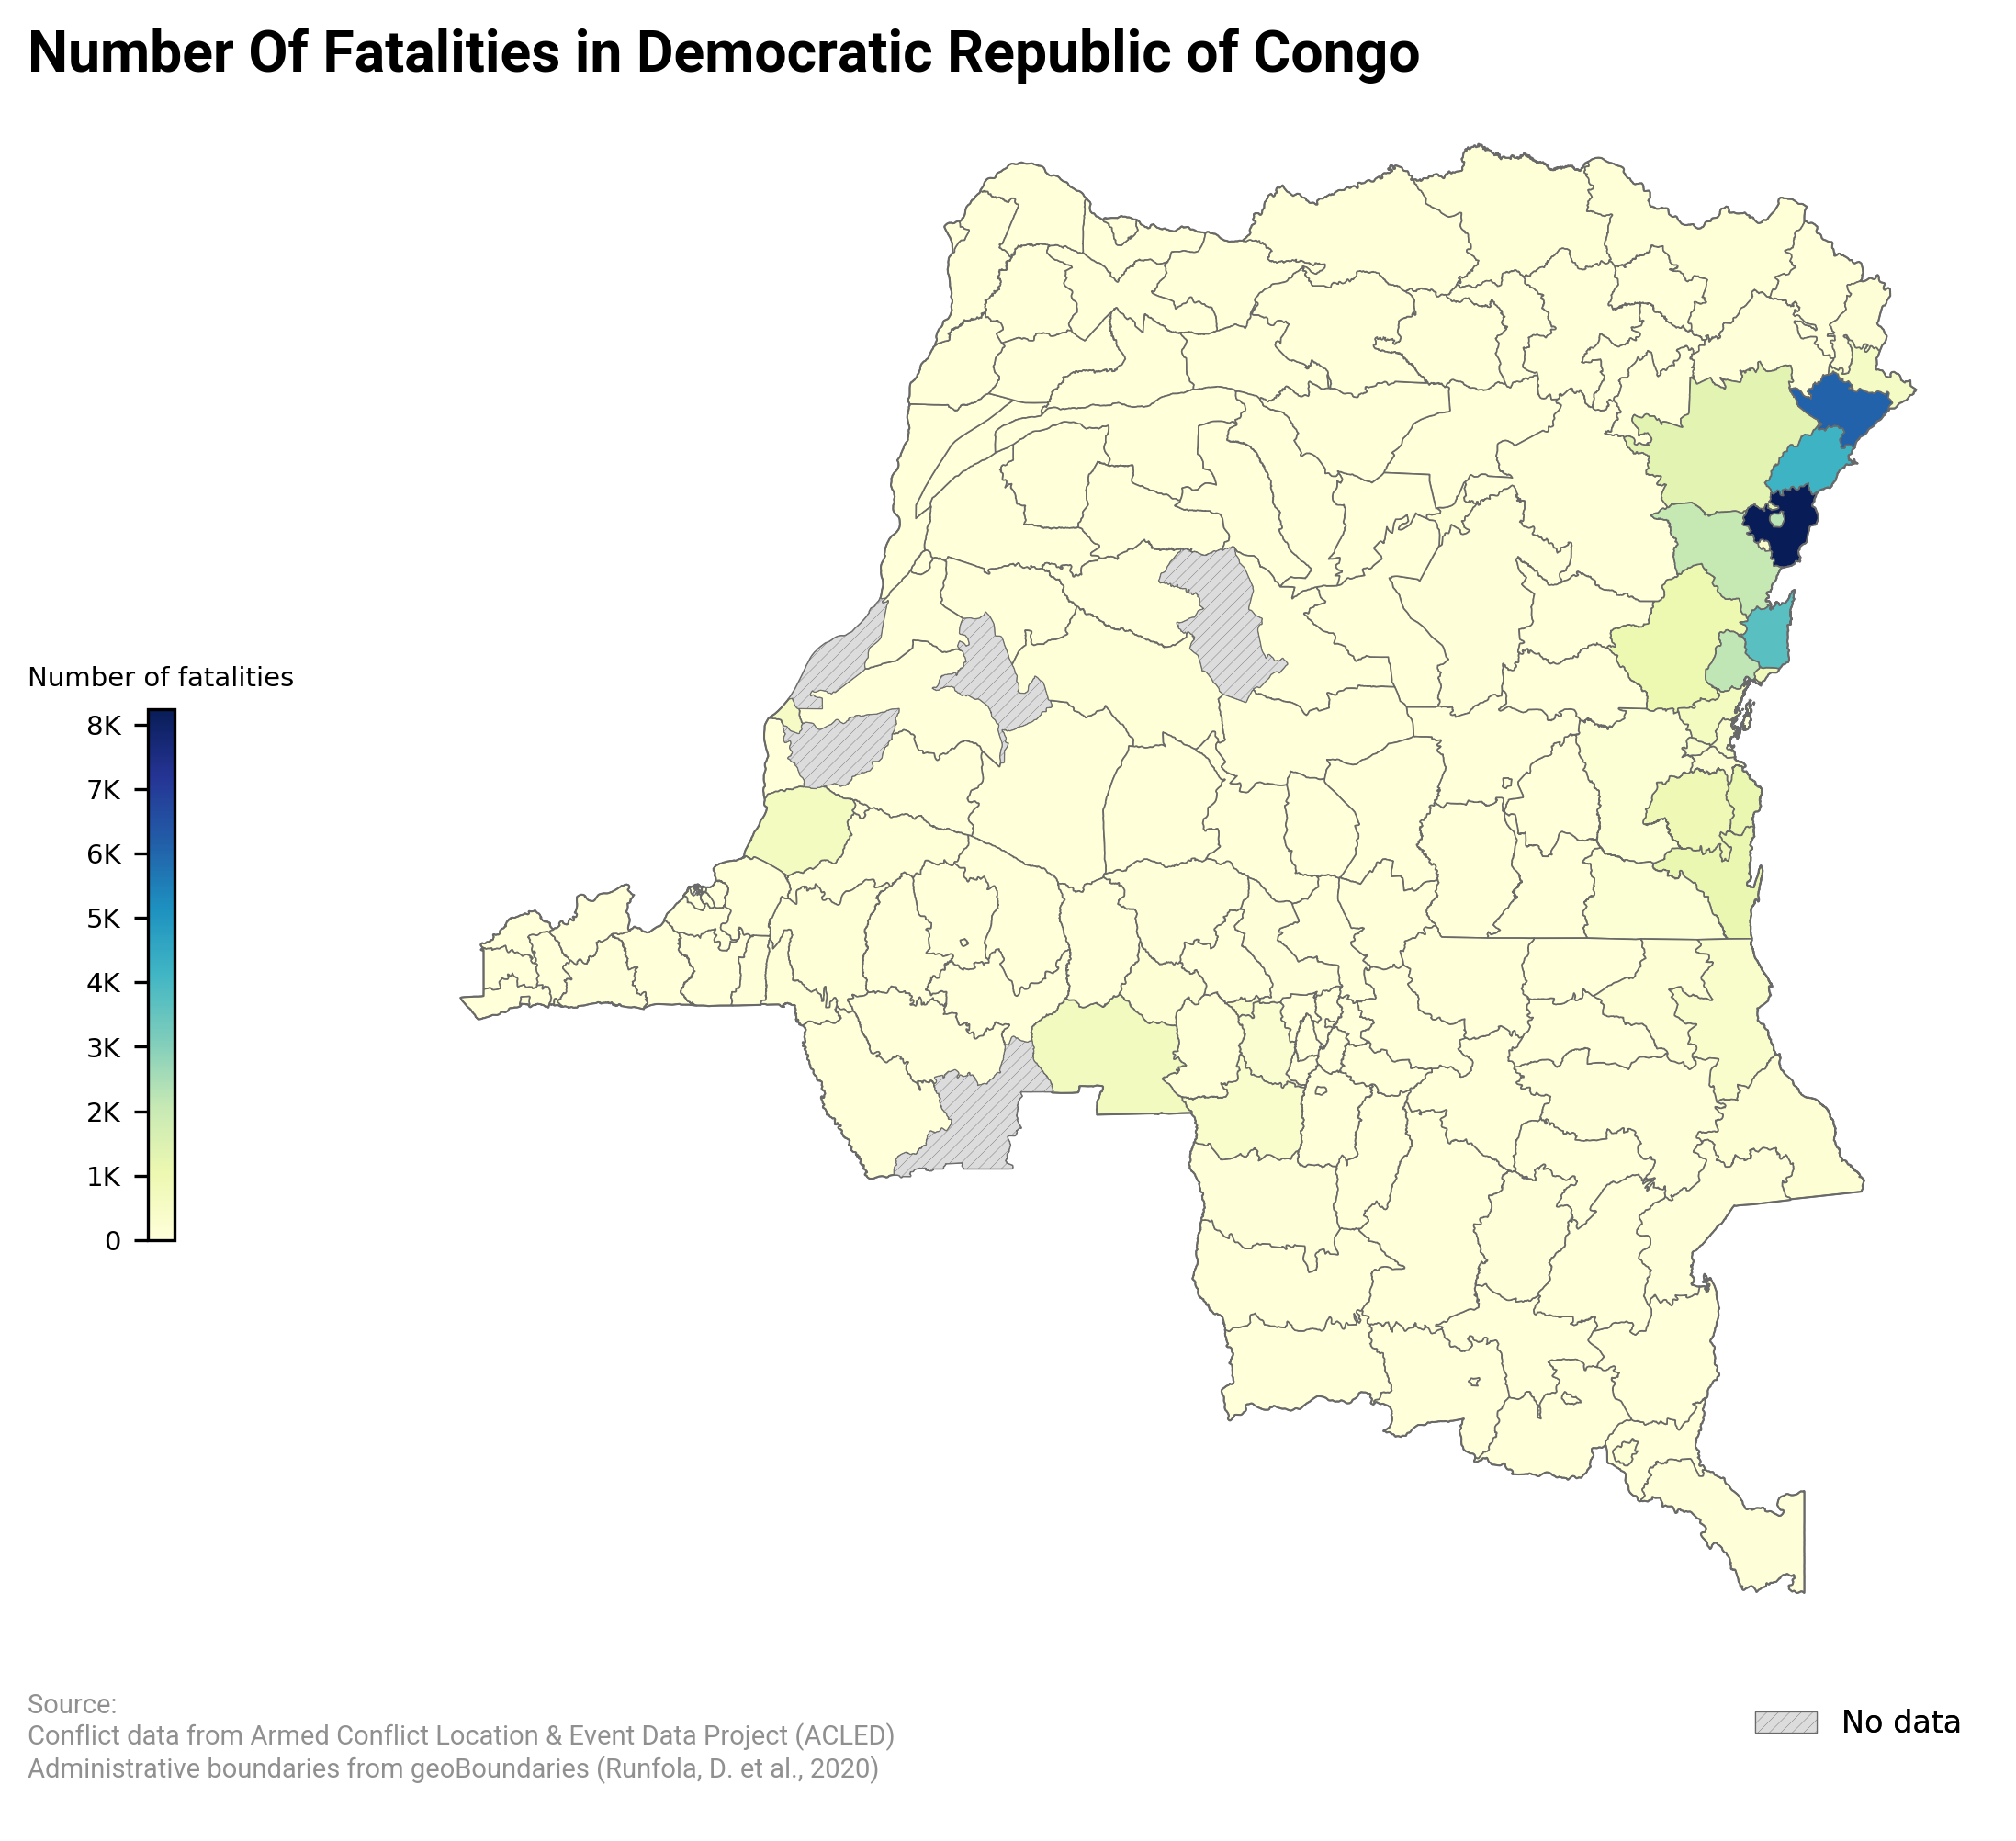

In [22]:
geoplot.plot_choropleth( 
    var="acled_fatalities",
    kwargs={
        "legend_type": "colorbar",
        "palette_name": "Reds",
        "edgecolor": "dimgray"
    }
);

## Plot Conflict Exposure - ACLED (Population Best)

In [ ]:
source = "acled"
geoplot.plot_choropleth( 
    var=f"{source}_exposure",
    subtitle="By township, from 2021 to 2025",
    kwargs={"legend_type": "colorbar"}
)
geoplot.plot_choropleth( 
    var=f"{source}_exposure_relative",
    subtitle="By township, from 2021 to 2025",
    kwargs={"legend_type": "colorbar"}
);

## Plot Conflict Exposure - ACLED (Custom Calculation)

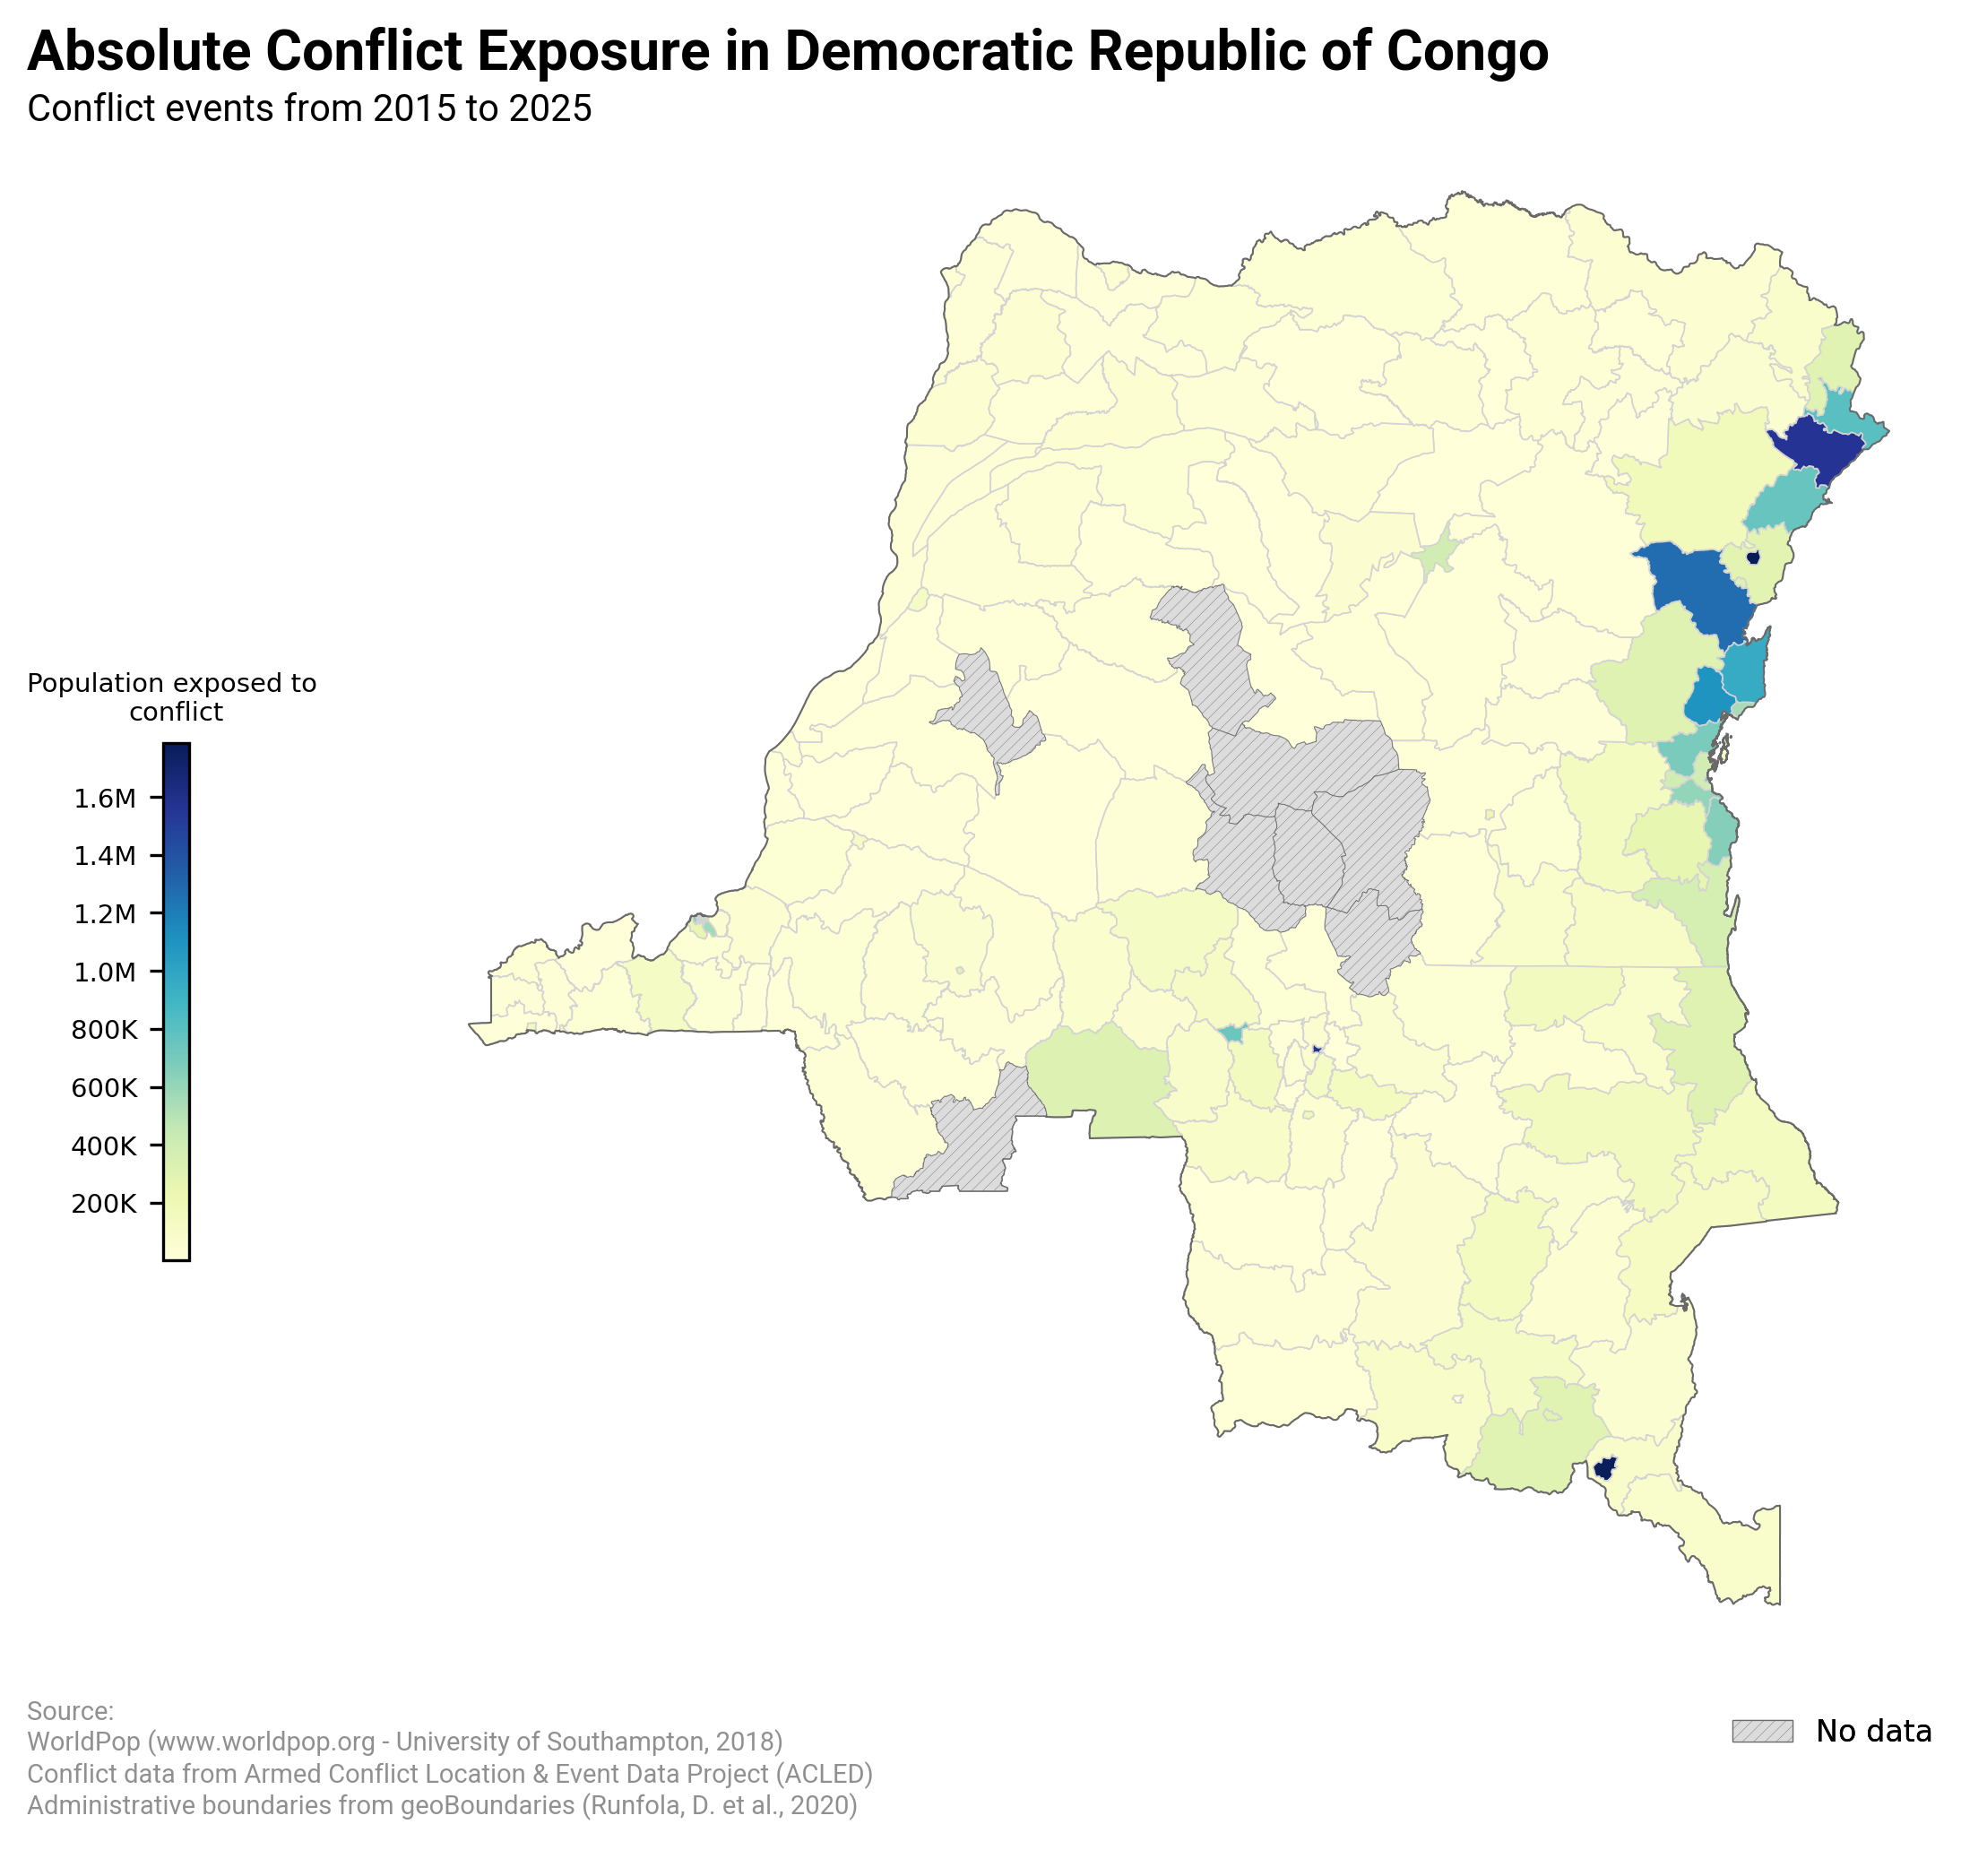

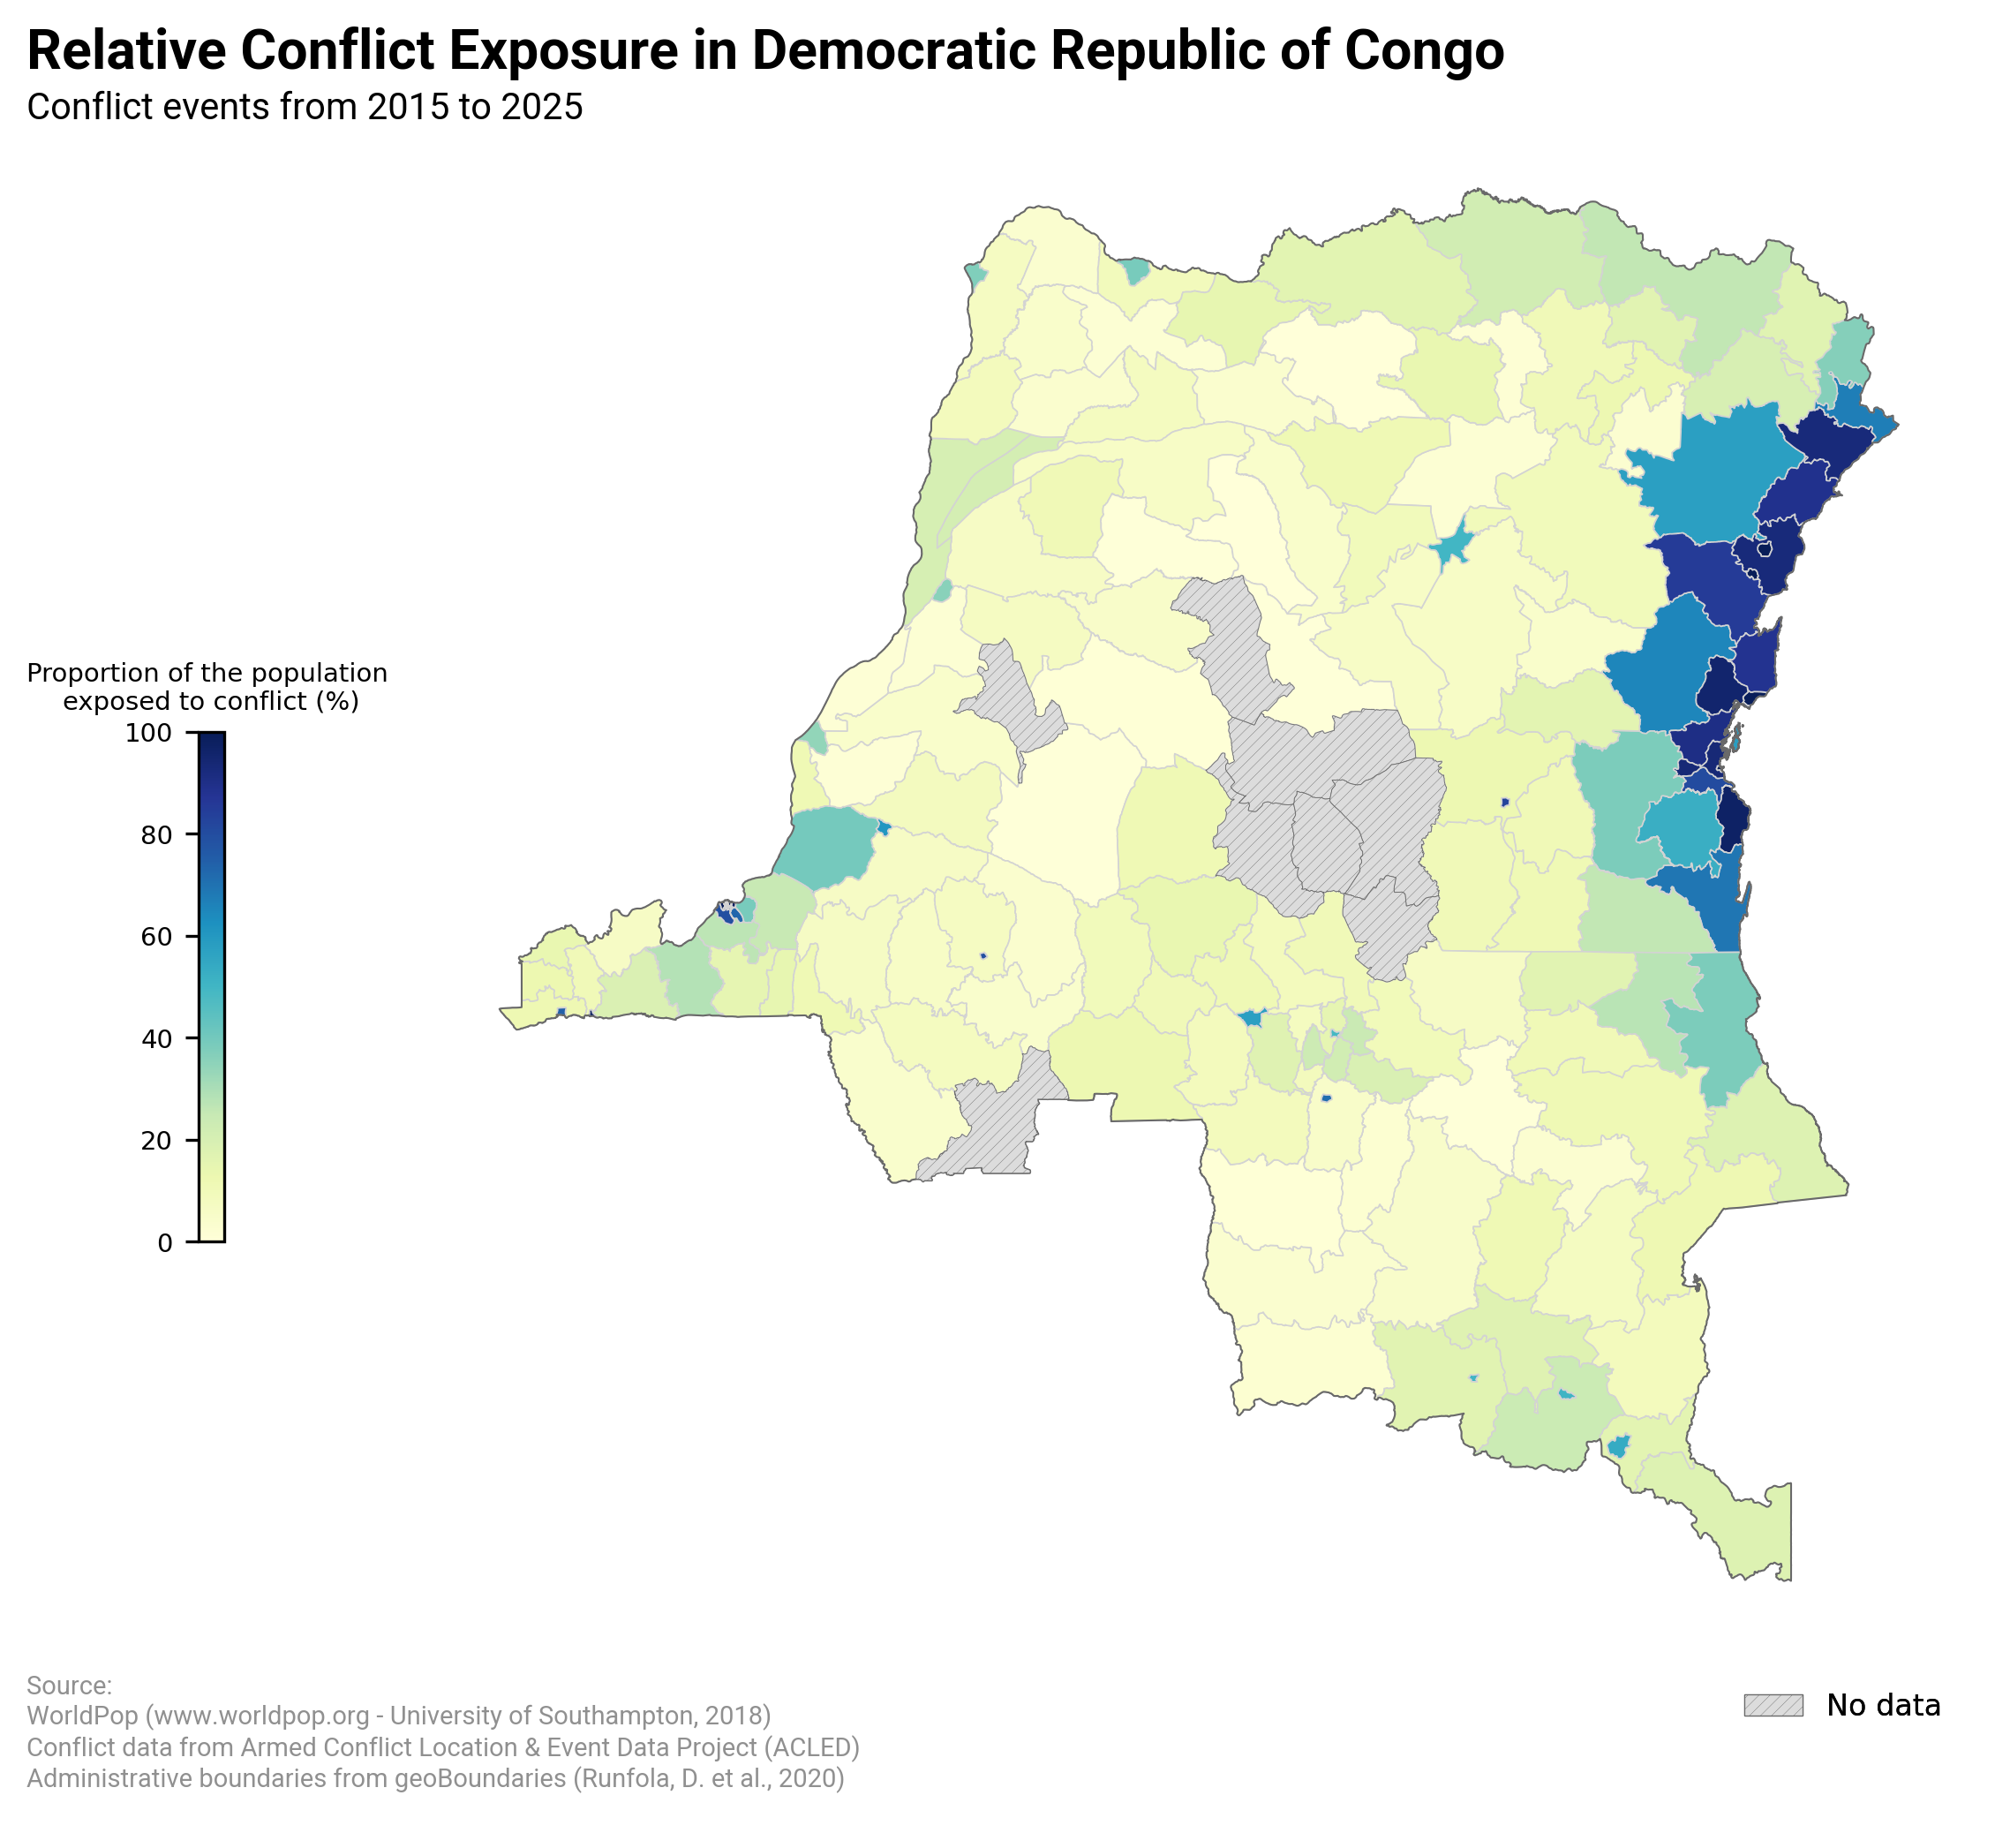

In [13]:
source = "wbg_acled"
geoplot.plot_choropleth( 
    var=f"{source}_{dm.asset}_exposure",
)
geoplot.plot_choropleth( 
    var=f"{source}_{dm.asset}_exposure_relative",
    var_bounds=[0, 100]
);

## Plot Conflict Exposure - UCDP

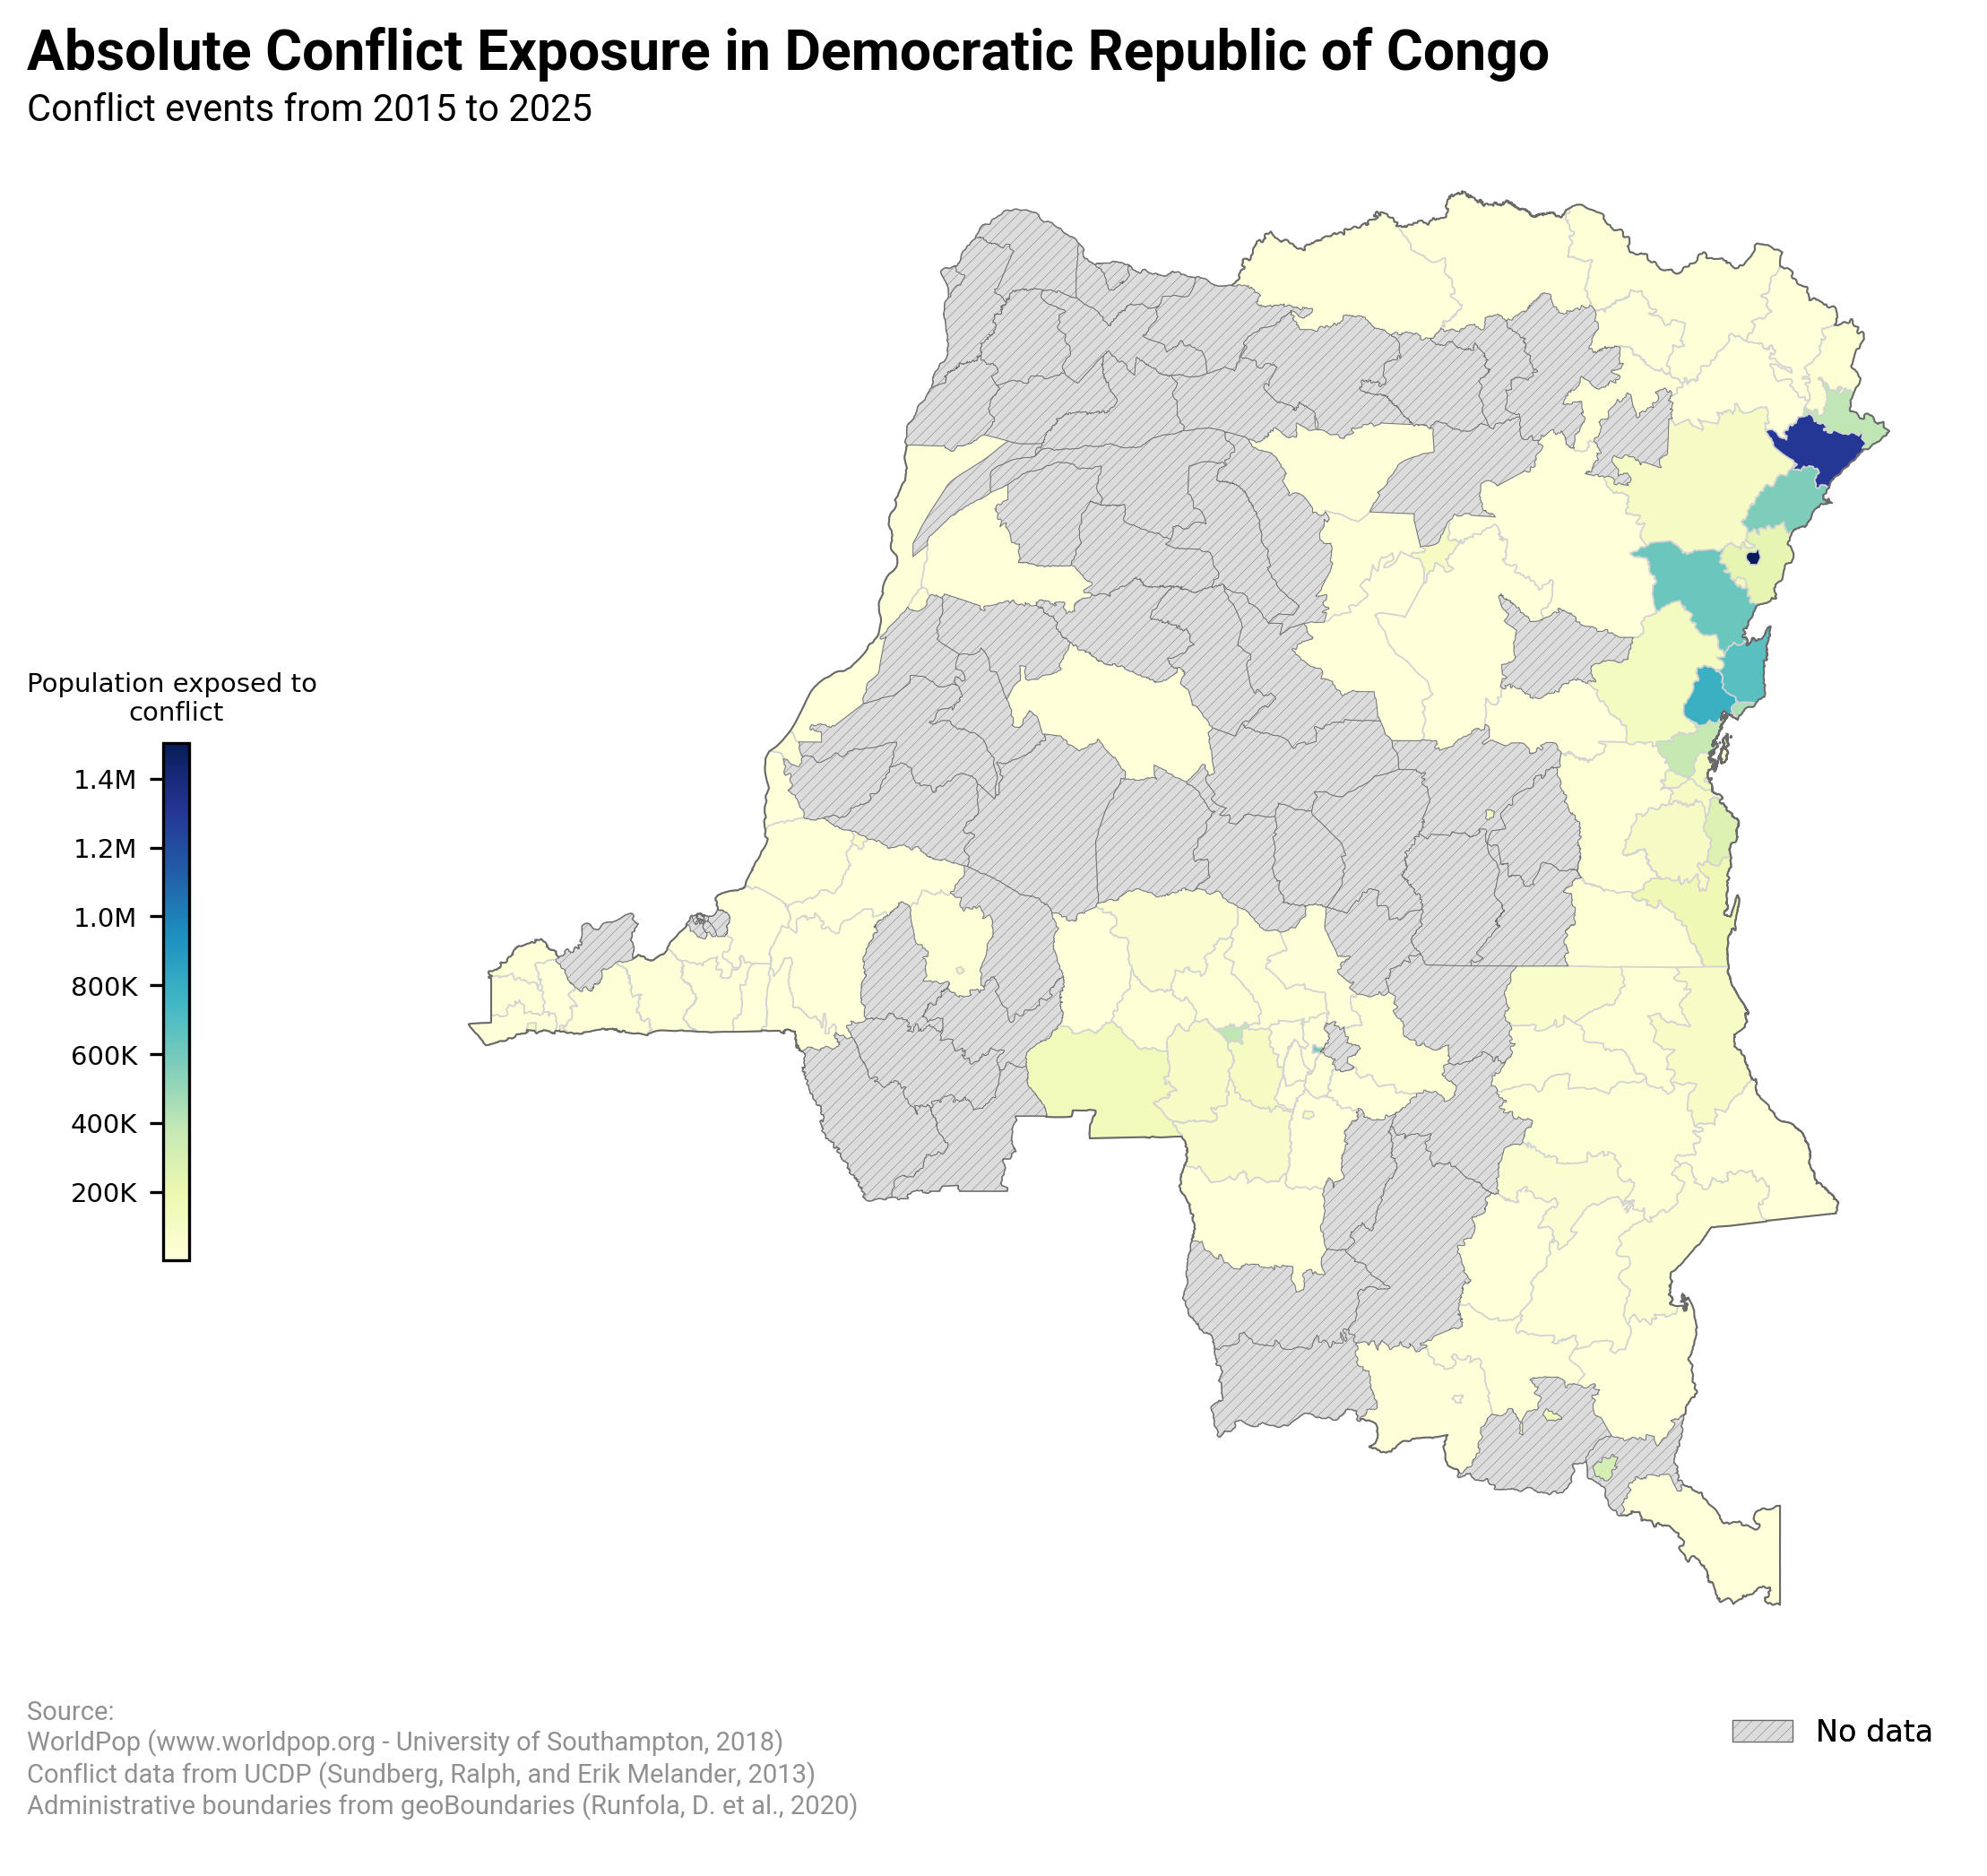

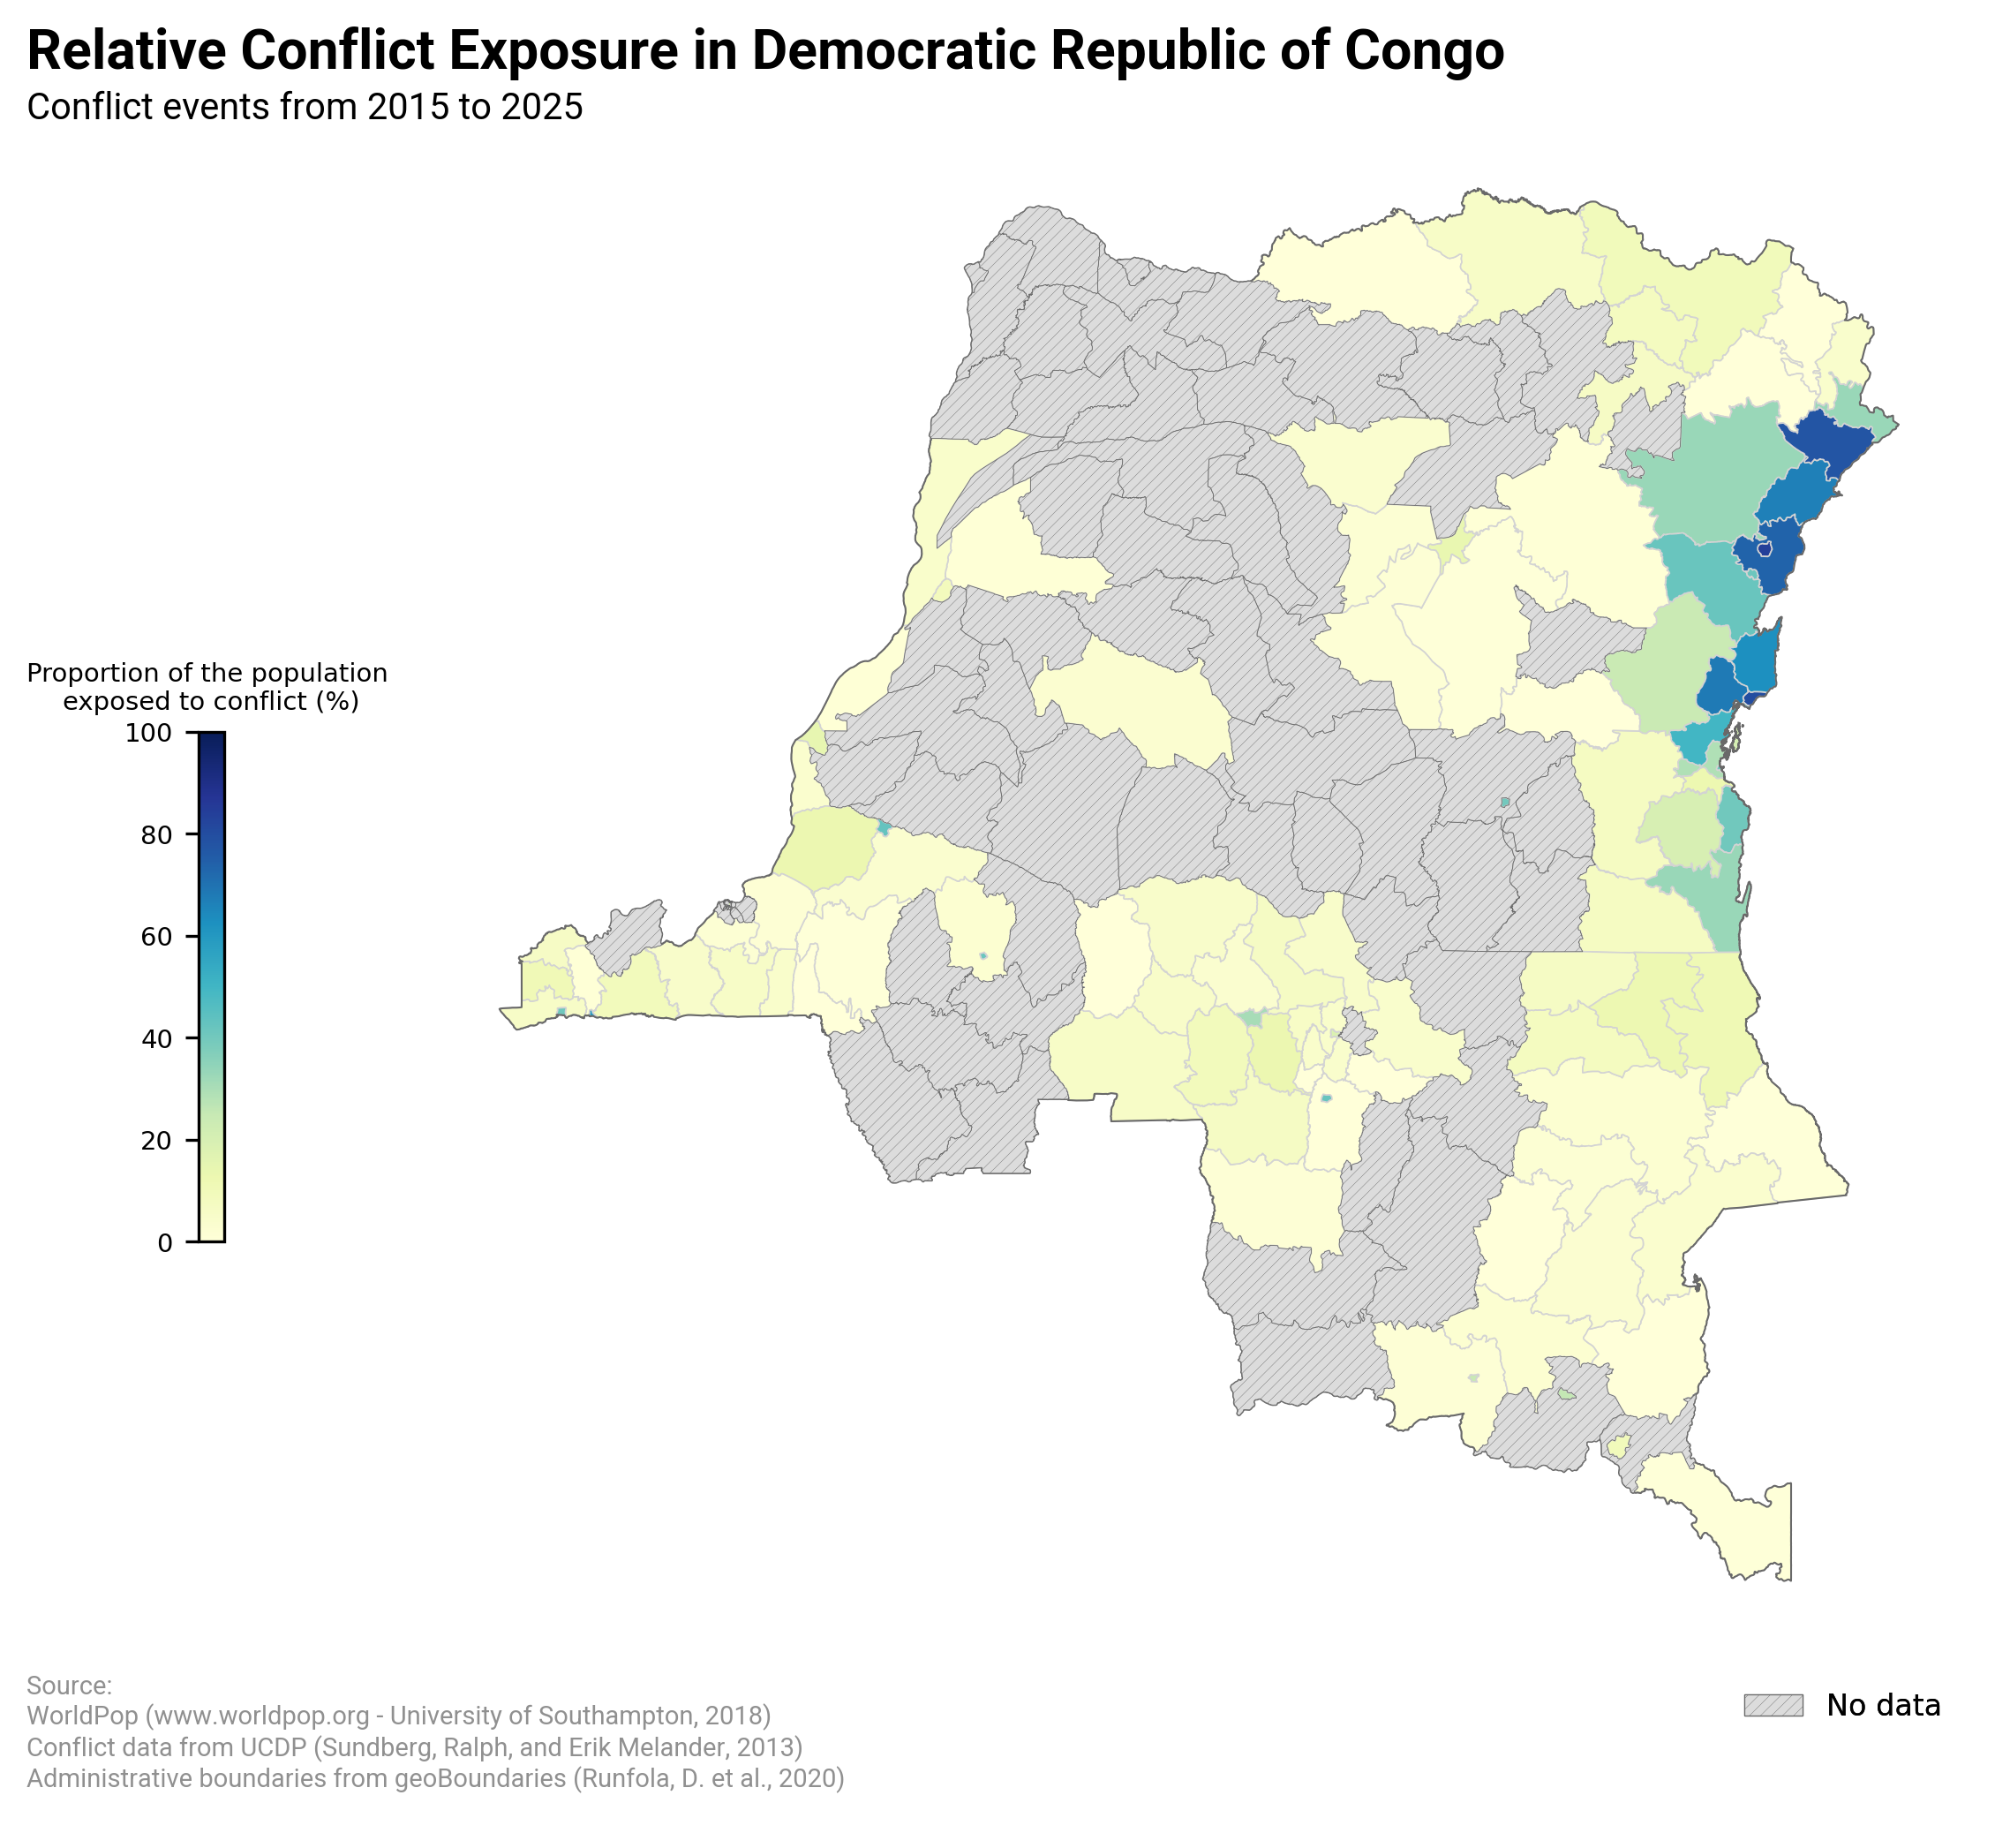

In [14]:
source = "ucdp"
geoplot.plot_choropleth( 
    var=f"{source}_{dm.asset}_exposure",
)
geoplot.plot_choropleth( 
    var=f"{source}_{dm.asset}_exposure_relative",
    var_bounds=[0, 100]
);

## Zoom Choropleth to a specific region

(<Axes: >, 0.18089583333333334)

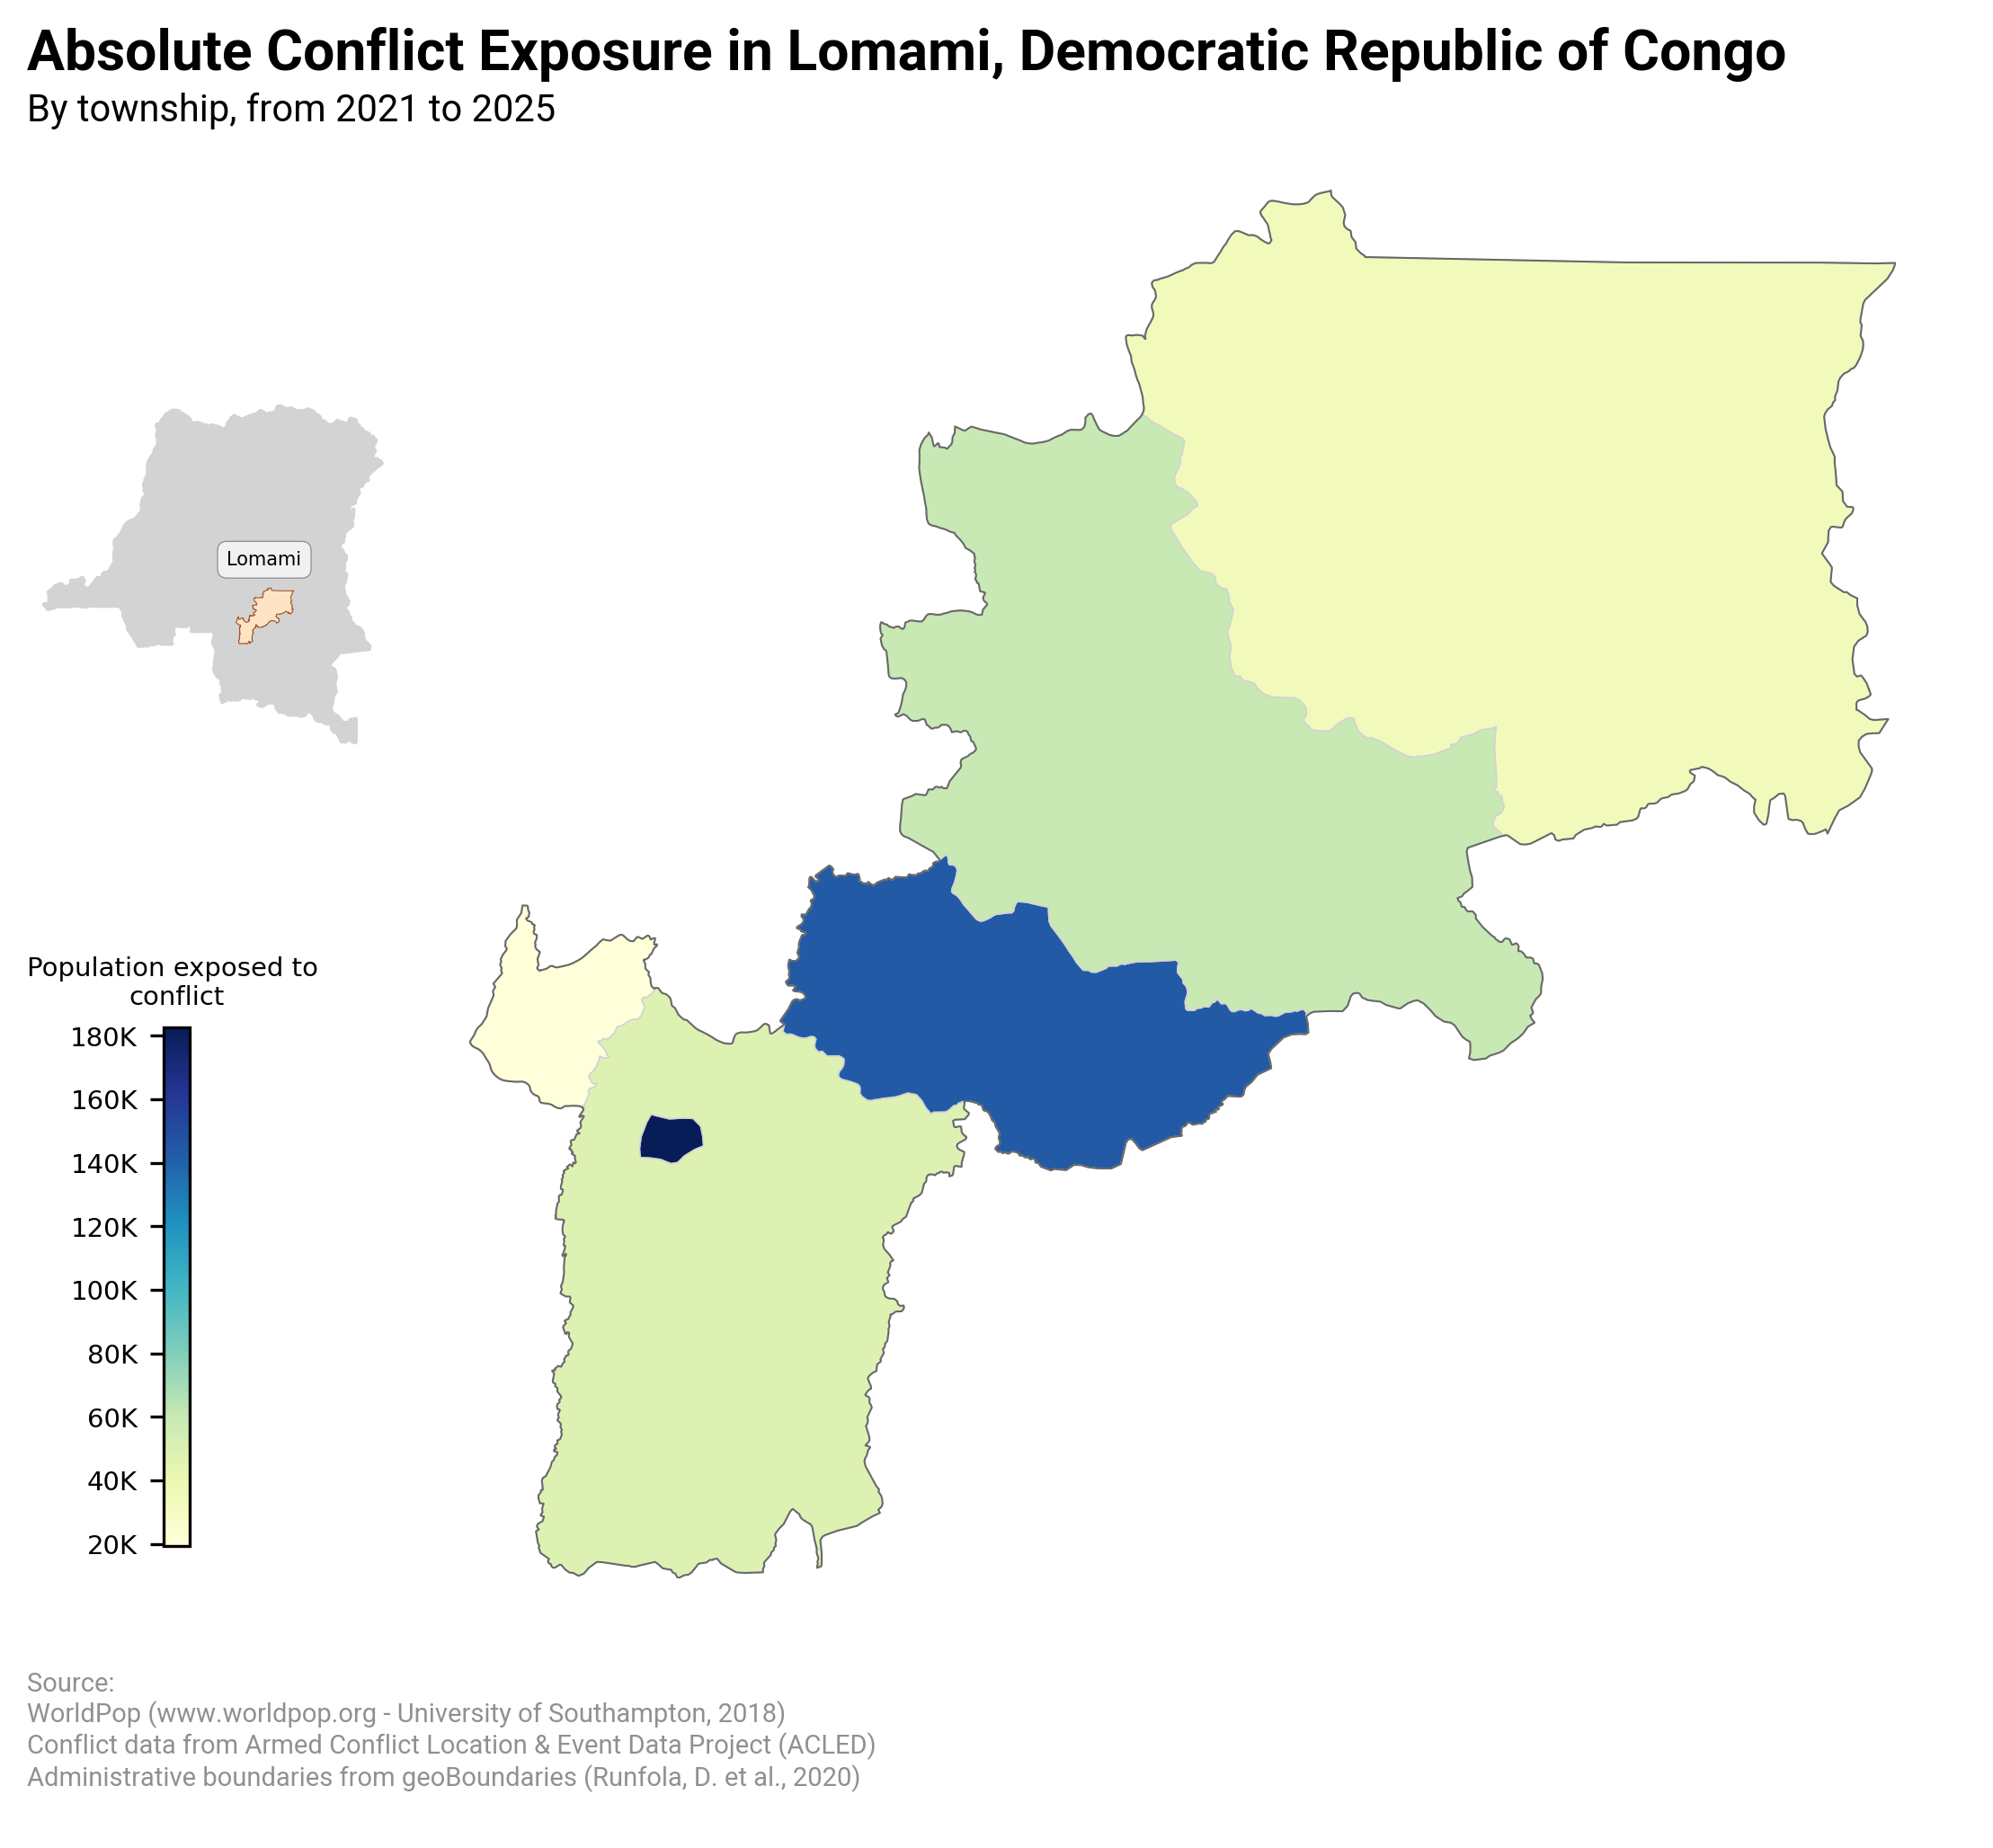

In [27]:
source = "wbg_acled"
geoplot.plot_choropleth( 
    var=f"{source}_{dm.asset}_exposure",
    zoom_to={"ADM1": "Lomami"},
    subtitle="By township, from 2021 to 2025"
)

In [ ]:
ax = geoplot.plot_choropleth( 
    var=f"{source}_{dm.asset}_exposure_relative",
    zoom_to={"ADM1": "Lakes"},
    subtitle="By township, from 2021 to 2025",
    var_bounds=[0, 100],
    kwargs={
        'legend_shrink': 0.20,
        'legend_type': 'colorbar',
    },
);

In [ ]:
source = "wbg_acled"
geoplot.plot_choropleth( 
    var=f"{source}_{dm.asset}_exposure",
    zoom_to={"ADM1": "Eastern Province"},
    subtitle="By township, from 2021 to 2025"
)
ax = geoplot.plot_choropleth( 
    var=f"{source}_{dm.asset}_exposure_relative",
    zoom_to={"ADM1": "Eastern Province"},
    subtitle="By township, from 2021 to 2025",
    var_bounds=[0, 100],
);

## Map Exposure to a Single Hazard

In [ ]:
hazard = "cyclone"
geoplot.plot_raster(hazard);

In [ ]:
import numpy as np
data = pd.DataFrame({
    "earthquake": np.array([1.0, 0.9, 1, 0.9, 1, 0.9, 0.8, 0.9]),
    "landslide": np.array([1.0, 0.9, 0, 0.1, 1, 0.9, 0.6, 0.5]),
    "flood": np.array([1, 0.9, 0, 0.1, 0, 0.1, 0.4, 0.5]),
    "cyclone": np.array([0, 0.1, 0, 0.1, 0, 0.1, 0.2, 0.5]),
})

p = 0.5
epsilon = 0.0001
weights = np.array([1/4, 1/4, 1/4, 1/4])

hazard_cols = ["earthquake", "landslide", "flood", "cyclone"]
data["arithmetic_mean"] = data[hazard_cols].multiply(weights, axis=1).sum(axis=1)
data["geometric_mean"] = (data[hazard_cols] + epsilon).pow(weights).prod(axis=1)
data["generalized_mean"] = (data[hazard_cols] ** p).multiply(weights, axis=1).sum(axis=1) ** (1 / p)

data

In [ ]:
geoplot.plot_choropleth(f"{hazard}");

In [ ]:
geoplot.plot_choropleth(f"{hazard}_{dm.asset}_exposure");

In [ ]:
geoplot.plot_choropleth(
    f"{hazard}_{dm.asset}_exposure_relative",
    kwargs={"legend_type": "colorbar"}
);

In [ ]:
geoplot.plot_choropleth(
    f"{hazard}_{dm.asset}_intensity_weighted_exposure_relative",
    kwargs={"legend_type": "colorbar"}
);

## Plot Multi-hazard Exposure Index and Multi-hazard Conflict Exposure Index

In [ ]:
geoplot.plot_choropleth( 
    var=f"mhs_all_{dm.asset}_exposure_relative",
    kwargs={
        "legend_type": "colorbar", 
        "linewidth": 0.1
    }
);

In [ ]:
ax, x = geoplot.plot_choropleth( 
    var=f"mhs_all_{dm.asset}_exposure_relative",
    kwargs={"legend_type": "colorbar", "legend_y": 0.5,}
);
geoplot.plot_points(
    "event_type", 
    dataset="acled", 
    clustering=False,  
    kwargs={
        "alpha": 0.5,
        "legend_y": 0.425,
        "markerscale": 0.5,
        "cmap": "tab10"
    },
    ax=ax, xpos=x,
);

In [ ]:
geoplot.plot_choropleth( 
    var=f"mhs_all_wbg_acled_{dm.asset}_intensity_weighted_exposure_relative",
    subtitle="By township, from 2021 to 2025",
    kwargs={"legend_type": "colorbar"}
);

In [ ]:
geoplot.plot_choropleth( 
    var=f"mhs_atmospheric_ucdp_{dm.asset}_exposure_relative",
    kwargs={"legend_type": "colorbar"}
);

# Bivariate Choropleth: Overlay Multi-hazard and Conflict Exposure

In [ ]:
geoplot.plot_bivariate_choropleth( 
    var1=f"wbg_acled_{dm.asset}_exposure_relative",
    var2=f"mhs_{dm.asset}_exposure_relative",
    var1_bounds=[0, 1],
    var2_bounds=[0, 1],
    binning="equal_intervals",
    kwargs={
        "legend_fontsize": 4, 
        "edgecolor": "white", 
        "linewidth": 0.2
    }
);

In [ ]:
geoplot.plot_bivariate_choropleth( 
    var1=f"wbg_acled_{dm.asset}_exposure_relative",
    var2=f"mhs_{dm.asset}_intensity_weighted_exposure_relative",
    var1_bounds=[0, 1],
    var2_bounds=[0, 1],
    binning="equal_intervals",
    kwargs={
        "legend_fontsize": 4, 
        "edgecolor": "white", 
        "linewidth": 0.2
    }
);

In [ ]:
geoplot.plot_bivariate_choropleth( 
    var1=f"ucdp_{dm.asset}_exposure_relative",
    var2=f"mhs_{dm.asset}_exposure_relative",
    #var1_bounds=[0, 1],
    var2_bounds=[0, 1],
    binning="equal_intervals",
    kwargs={
        "legend_fontsize": 4, 
        "edgecolor": "white", 
        "linewidth": 0.2
    }
);

In [ ]:
geoplot.plot_bivariate_choropleth( 
    var1=f"ucdp_{dm.asset}_exposure_relative",
    var2=f"mhs_{dm.asset}_intensity_weighted_exposure_relative",
    #var1_bounds=[0, 1],
    var2_bounds=[0, 1],
    binning="equal_intervals",
    kwargs={
        "legend_fontsize": 4, 
        "edgecolor": "white", 
        "linewidth": 0.2
    }
);

## Zoom Bivariate Choropleth to a specific region

In [ ]:
geoplot.plot_bivariate_choropleth( 
    var1=f"wbg_acled_{dm.asset}_exposure_relative",
    var2=f"mhs_{dm.asset}_intensity_weighted_exposure_relative",
    var1_bounds=[0, 1],
    var2_bounds=[0, 1],
    binning="equal_intervals",
    kwargs={"legend_fontsize": 4},
    zoom_to={"ADM1": "Kigali City"},
);

## Interactive Map

In [ ]:
m = geoplot.plot_folium(
    adm_level=adm_level,
    var="mhs_all_wbg_acled_worldpop_exposure_relative",
    kwargs={"zoom_start": 9}
)
m

In [ ]:
 m.save("folium.html")